In [1]:
FNAME = 'wannabe_final'

# 00 Init

## Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [5]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [6]:
! pip install codes

## Import py files

In [7]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.newVectorDQN import *
from codes.net.basicWithBias import *
from codes.trainer.validShutDown import *
# from codes.tester.basic import *
from codes.tester.validShutDown import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## Import Libraries

# 01 Info

## level dictionary

In [8]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [9]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.001
LEARN_DECAY = 0.25
LEARN_EPOCH = 50000
# LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 128
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [10]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':0.1, 'no_progress' : -1},
                    dones={'win':True, 'lose':True, 'progress':False, 'guess':False, 'no_progress' : False})

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

agent = Agent(env=env,
              net=net,
              MEM_SIZE=MEM_SIZE,
              MEM_SIZE_MIN=MEM_SIZE_MIN,
              BATCH_SIZE=BATCH_SIZE,
              LEARNING_RATE=LEARNING_RATE,
              LEARN_DECAY=LEARN_DECAY,
              LEARN_EPOCH=LEARN_EPOCH,
              # LEARN_MIN=LEARN_MIN,
              DISCOUNT=DISCOUNT,
              EPSILON=EPSILON,
              EPSILON_DECAY=EPSILON_DECAY,
              EPSILON_MIN=EPSILON_MIN,
              UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## TRAIN_PARAMETERS

In [11]:
EPISODES = 100000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_TIMESTEPS = ['every timestep', 'every episodes']
TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0]
VIUSAL_INTERVAL = 100

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

## valid agent in train

In [12]:
tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## main

In [19]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=False,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [14]:
with open(os.path.join(trainer.total_path, f'{3*EPISODES}.pkl'), "rb") as f:
    trainer = pickle.load(f)

In [ ]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [ ]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}'), "wb") as f:
    pickle.dump(trainer, f)

Episode: [100000/100]| Median progress: 19.00 | Median reward: 5.90 | Win rate : 0.820 | Epsilon: 0.01
Episode: [100000/200]| Median progress: 16.00 | Median reward: 5.10 | Win rate : 0.760 | Epsilon: 0.01
Episode: [100000/300]| Median progress: 18.00 | Median reward: 5.90 | Win rate : 0.840 | Epsilon: 0.01
Episode: [100000/400]| Median progress: 17.00 | Median reward: 5.30 | Win rate : 0.870 | Epsilon: 0.01
Episode: [100000/500]| Median progress: 16.00 | Median reward: 4.95 | Win rate : 0.760 | Epsilon: 0.01
Episode: [100000/600]| Median progress: 18.50 | Median reward: 5.90 | Win rate : 0.790 | Epsilon: 0.01
Episode: [100000/700]| Median progress: 16.50 | Median reward: 5.20 | Win rate : 0.810 | Epsilon: 0.01
Episode: [100000/800]| Median progress: 16.50 | Median reward: 5.00 | Win rate : 0.790 | Epsilon: 0.01
Episode: [100000/900]| Median progress: 17.50 | Median reward: 5.40 | Win rate : 0.780 | Epsilon: 0.01
Episode: [100000/1000]| Median progress: 17.00 | Median reward: 5.55 | Wi

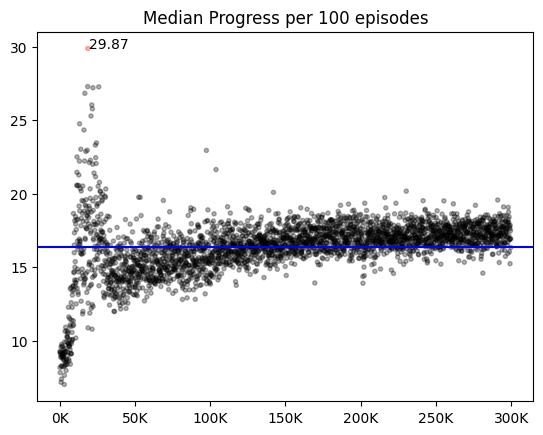

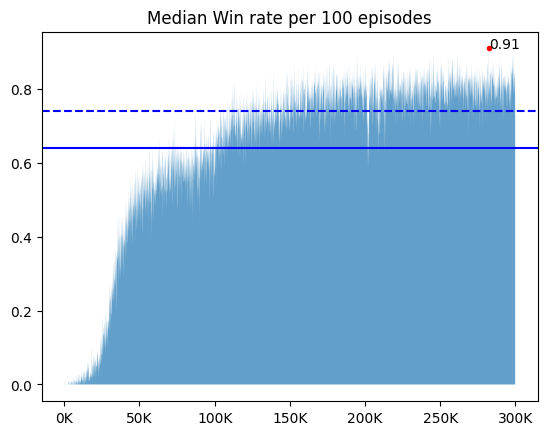

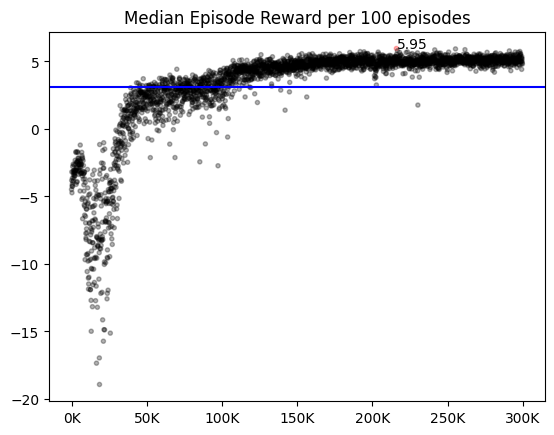

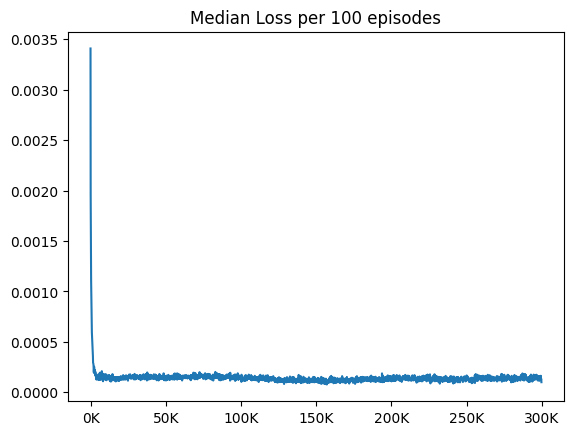

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final'는 이미 존재합니다.
모델이 저장되었습니다.


In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

- 작은 입실롬으로

In [15]:
t = trainer

In [22]:
trainer.agent.epsilon = 0.001
trainer.agent.epsilon_min = 0.001
trainer.agent.learning_rate = 0.0001
trainer.agent.replay_memory = t.agent.replay_memory
trainer.agent.model = t.agent.model
trainer.agent.target_model = t.agent.target_model
trainer.progress_list = t.progress_list
trainer.wins_list = t.wins_list
trainer.ep_rewards_list = t.ep_rewards_list

Episode: [100000/100]| Median progress: 18.50 | Median reward: 5.90 | Win rate : 0.890 | Epsilon: 0.00
valid latest successed model
Valid n:1000, Median progress: 18.00, Median reward: 5.90, Win rate : 0.849
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.824
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.822
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.815
Valid n:1000, Median progress: 18.00, Median reward: 5.70, Win rate : 0.831
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.803
Valid n:1000, Median progress: 18.00, Median reward: 5.90, Win rate : 0.829
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.821
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.812
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.808
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.823
Episode: [100000/200]| Median pr

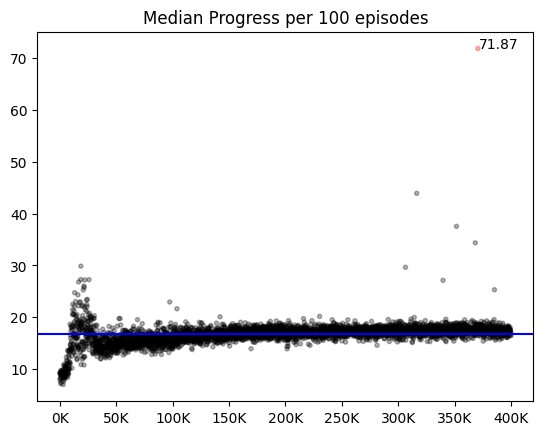

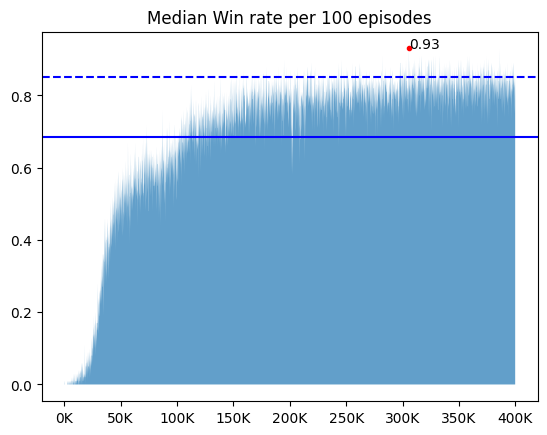

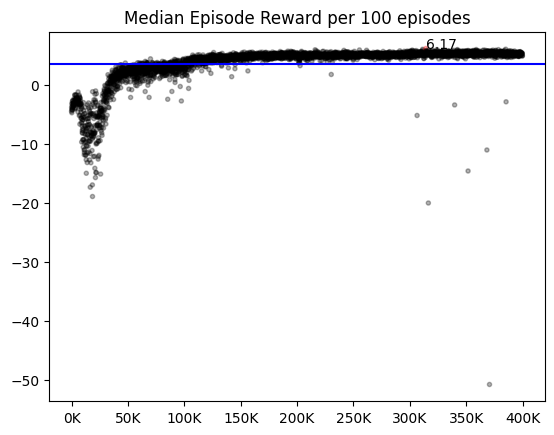

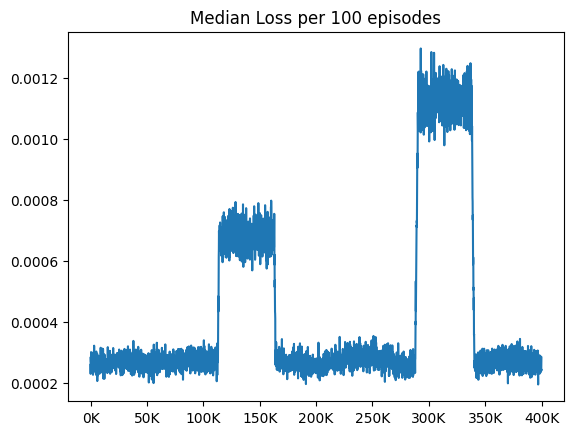

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final'는 이미 존재합니다.
모델이 저장되었습니다.


In [23]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

In [58]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}.pkl'), "wb") as f:
    pickle.dump(trainer, f)

Episode: [100000/100]| Median progress: 17.00 | Median reward: 5.60 | Win rate : 0.850 | Epsilon: 0.00
Episode: [100000/200]| Median progress: 18.00 | Median reward: 5.65 | Win rate : 0.950 | Epsilon: 0.00
valid latest successed model
Valid n:1000, Median progress: 17.00, Median reward: 5.30, Win rate : 0.798
Valid n:1000, Median progress: 18.00, Median reward: 5.70, Win rate : 0.809
Valid n:1000, Median progress: 18.00, Median reward: 5.65, Win rate : 0.813
Valid n:1000, Median progress: 18.00, Median reward: 5.70, Win rate : 0.818
Valid n:1000, Median progress: 18.00, Median reward: 5.70, Win rate : 0.841
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.832
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.824
Valid n:1000, Median progress: 18.00, Median reward: 5.65, Win rate : 0.824
Valid n:1000, Median progress: 18.00, Median reward: 5.60, Win rate : 0.846
Valid n:1000, Median progress: 17.00, Median reward: 5.60, Win rate : 0.811
Valid

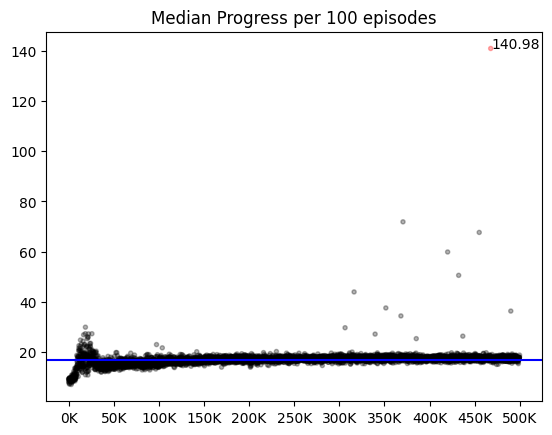

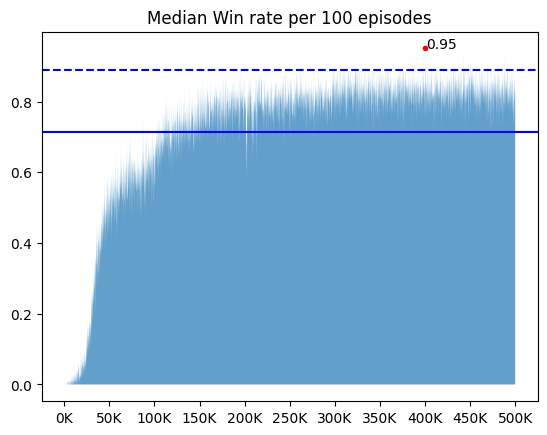

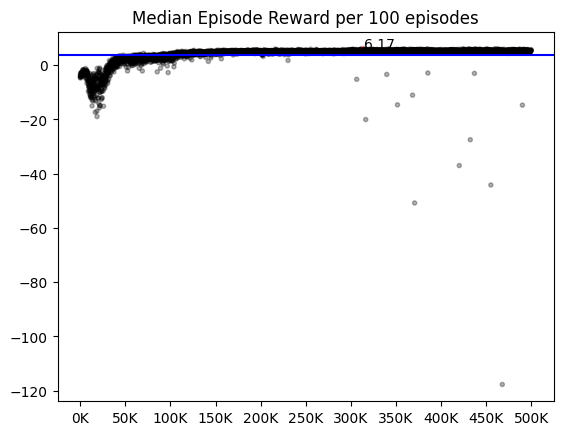

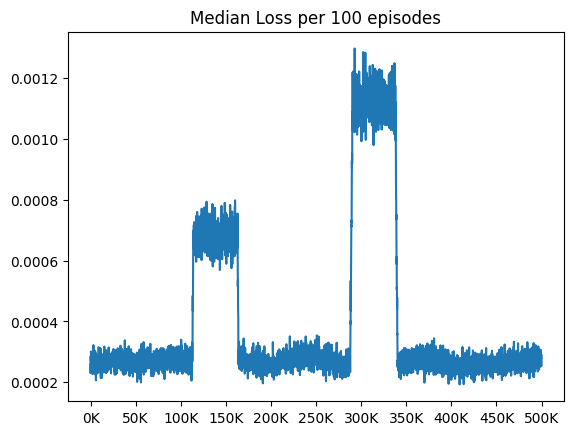

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/wannabe_final'는 이미 존재합니다.
모델이 저장되었습니다.


In [59]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

In [60]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}.pkl'), "wb") as f:
    pickle.dump(trainer, f)

In [65]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

KeyboardInterrupt: 

In [ ]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}.pkl'), "wb") as f:
    pickle.dump(trainer, f)

# 03 Tester

## def tester env, agent

In [24]:
tester_env = LimitedMinesweeperEnv(map_size=level['easy']['map_size'],
                                    n_mines=level['easy']['n_mines'],
                                    train=False)

tester_agent = Agent(env=tester_env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## def tester

### fixed

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_valid'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_train'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['final_model'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_successed'])

### random

In [34]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.852


In [26]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.60, Win rate : 0.813


In [27]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.818


In [28]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.828


### random

In [61]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.60, Win rate : 0.842


In [66]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.70, Win rate : 0.837


In [63]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.70, Win rate : 0.811


In [64]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.70, Win rate : 0.822


## 진 케이스 시각화

In [50]:
target_done = tester.lost_game_done
idx_iteration = iter(range(len(target_done)))

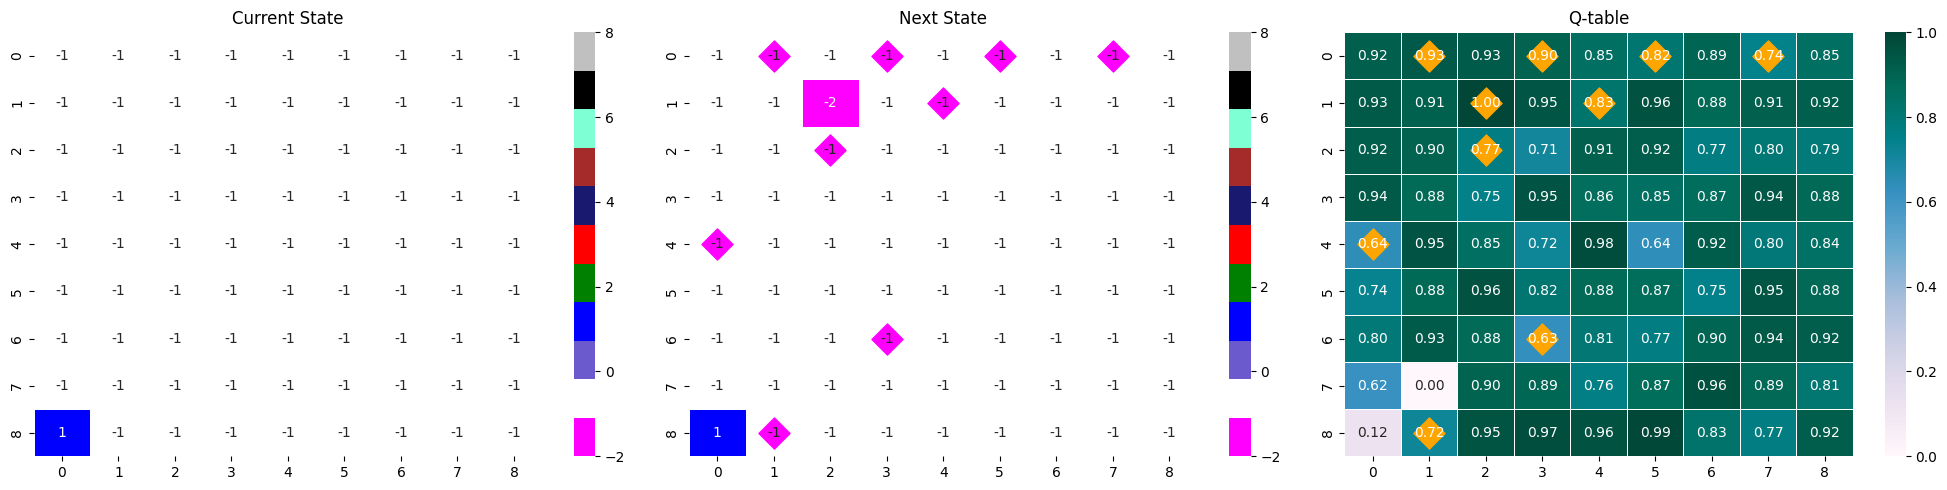

In [36]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx])

In [51]:
target_iter = tester.lost_game_per_epi

In [56]:
epi, epi_df = next(target_iter)

tester.replay_single_episode(epi_df)

coord (8, 0) is clicked.


 
coord (4, 2) is clicked.


 
coord (6, 3) is clicked.


 
coord (5, 4) is clicked.


 
coord (7, 4) is clicked.


 
coord (6, 4) is clicked.


 
coord (4, 4) is clicked.


 
coord (8, 5) is clicked.


 
coord (4, 3) is clicked.


In [39]:
tester.lost_more18_percent

0.606

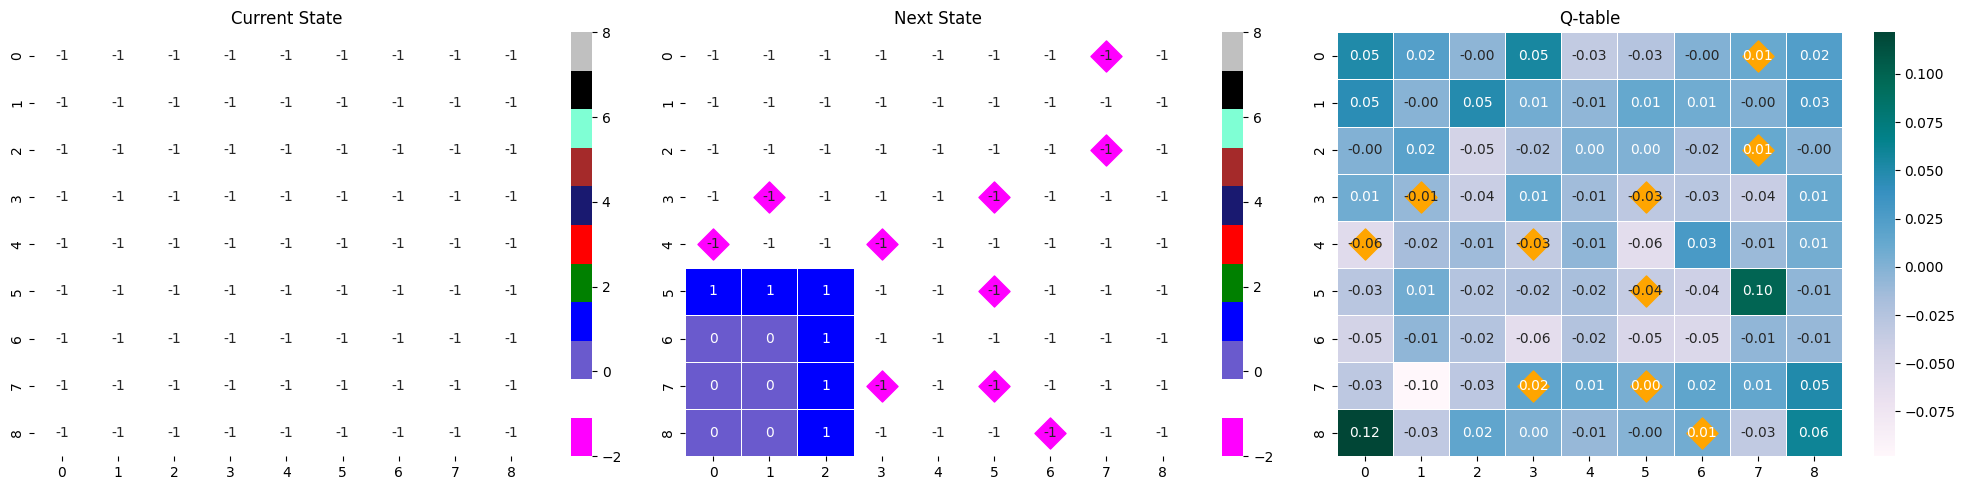

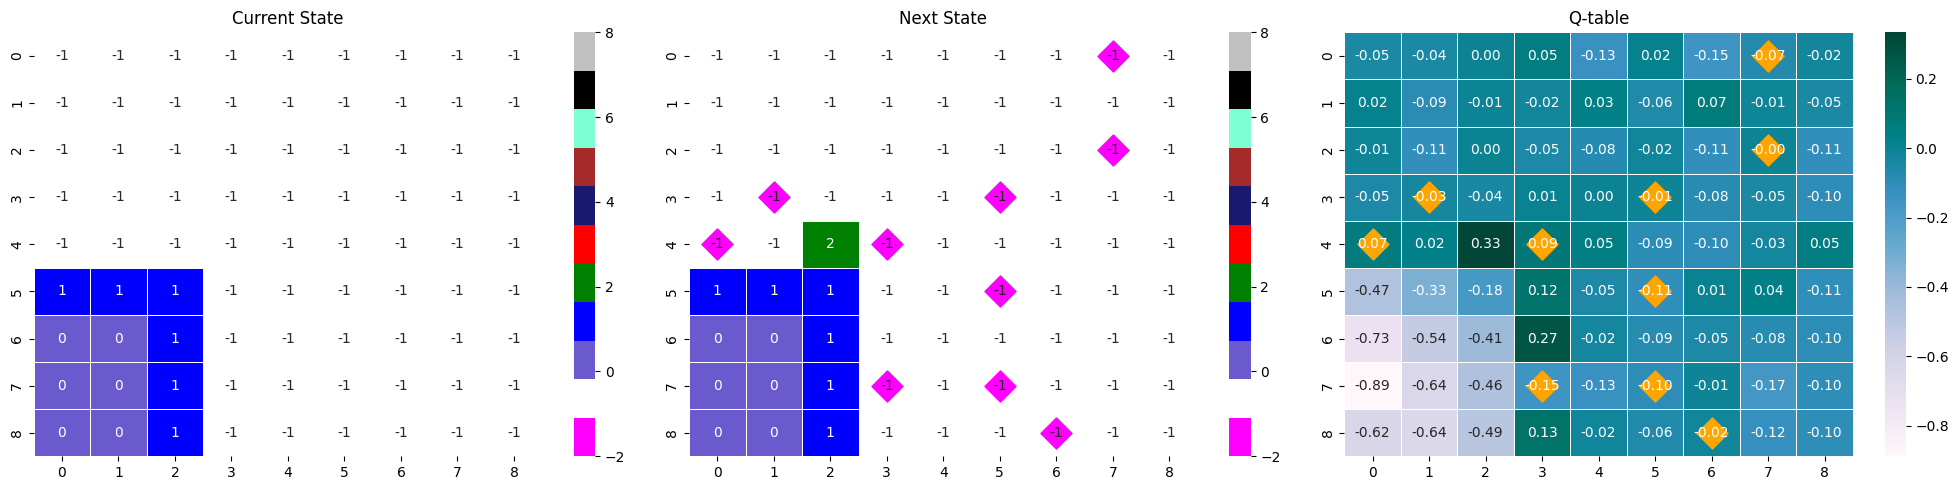

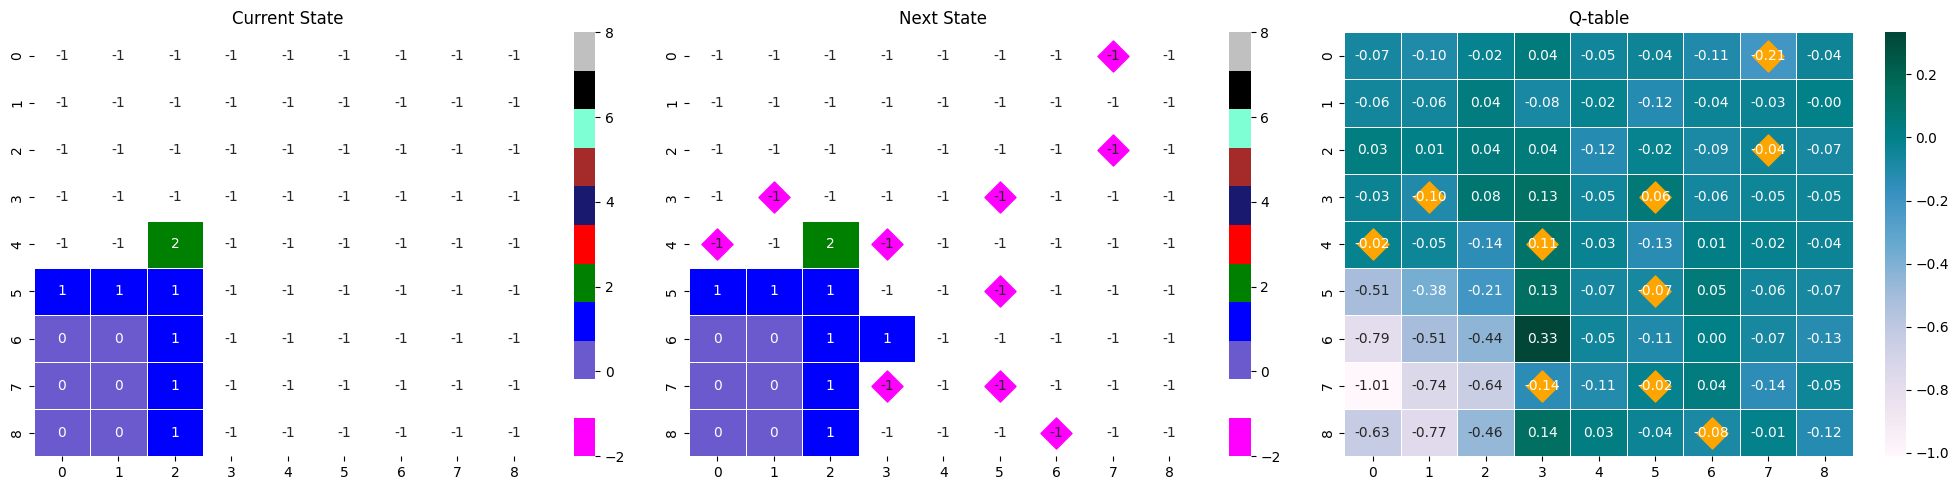

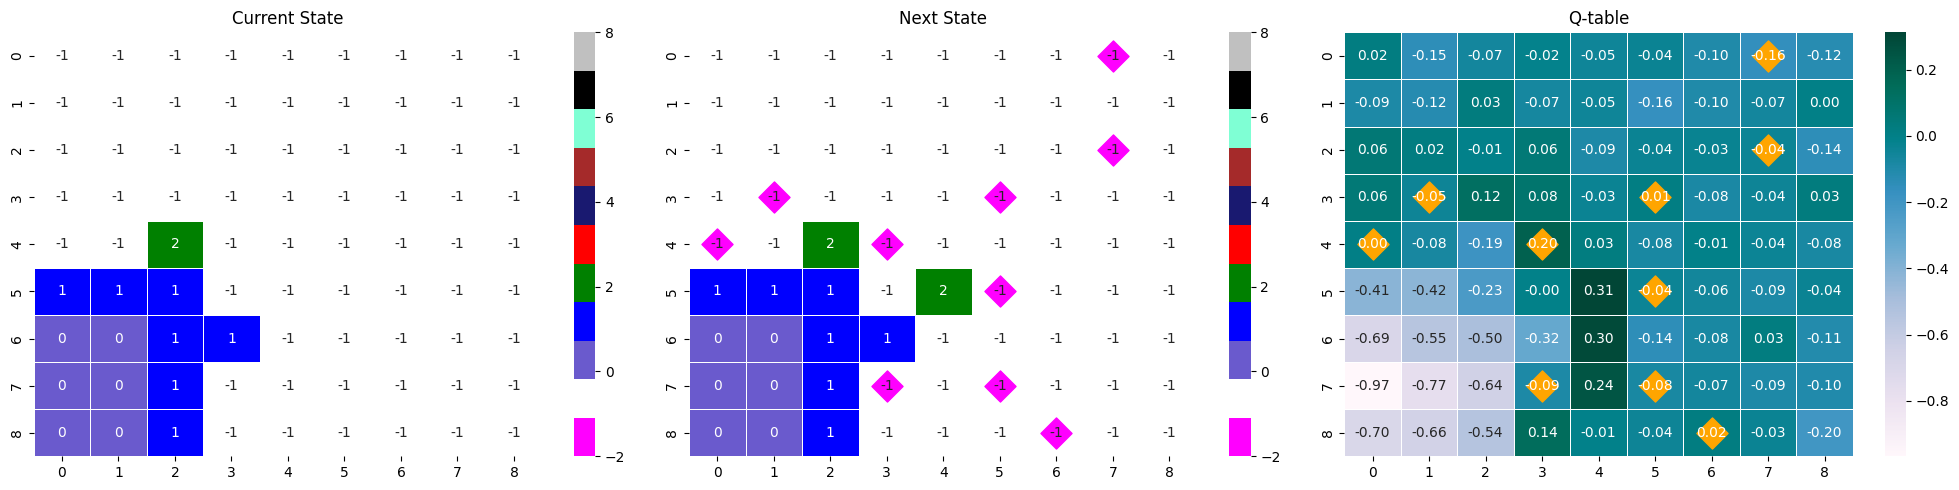

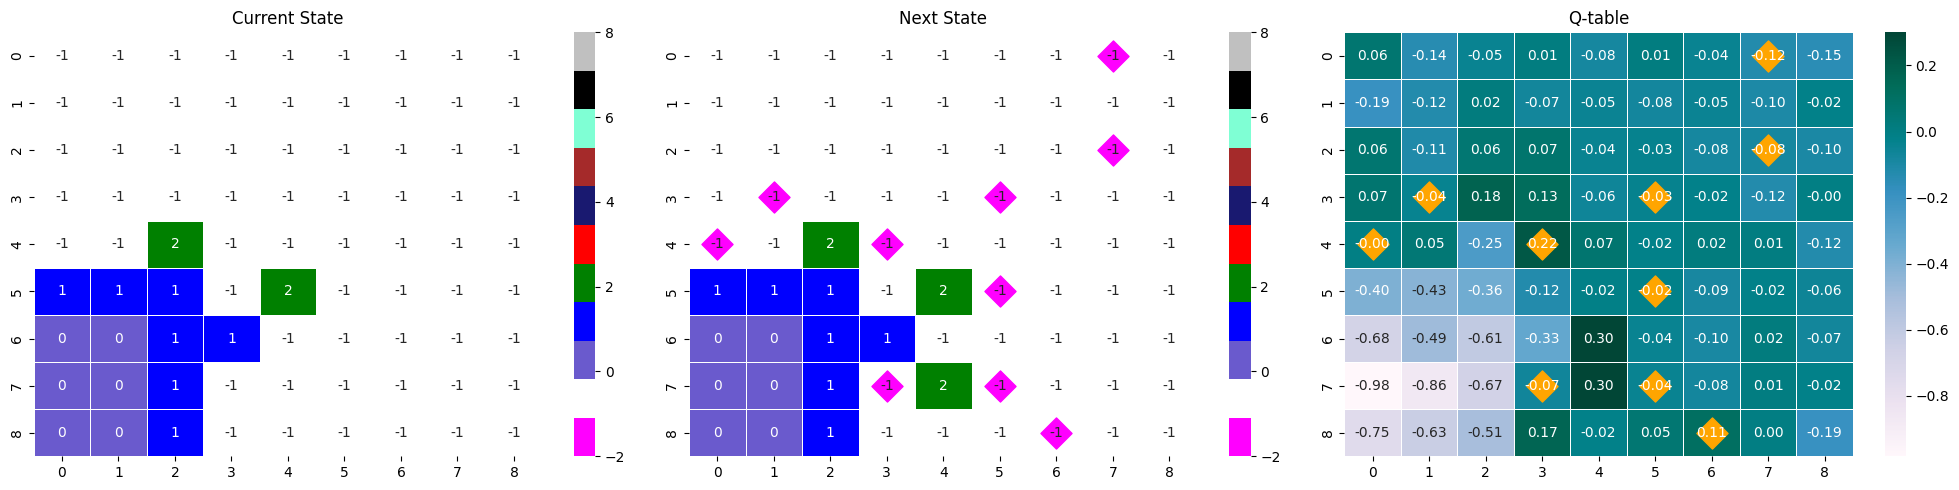

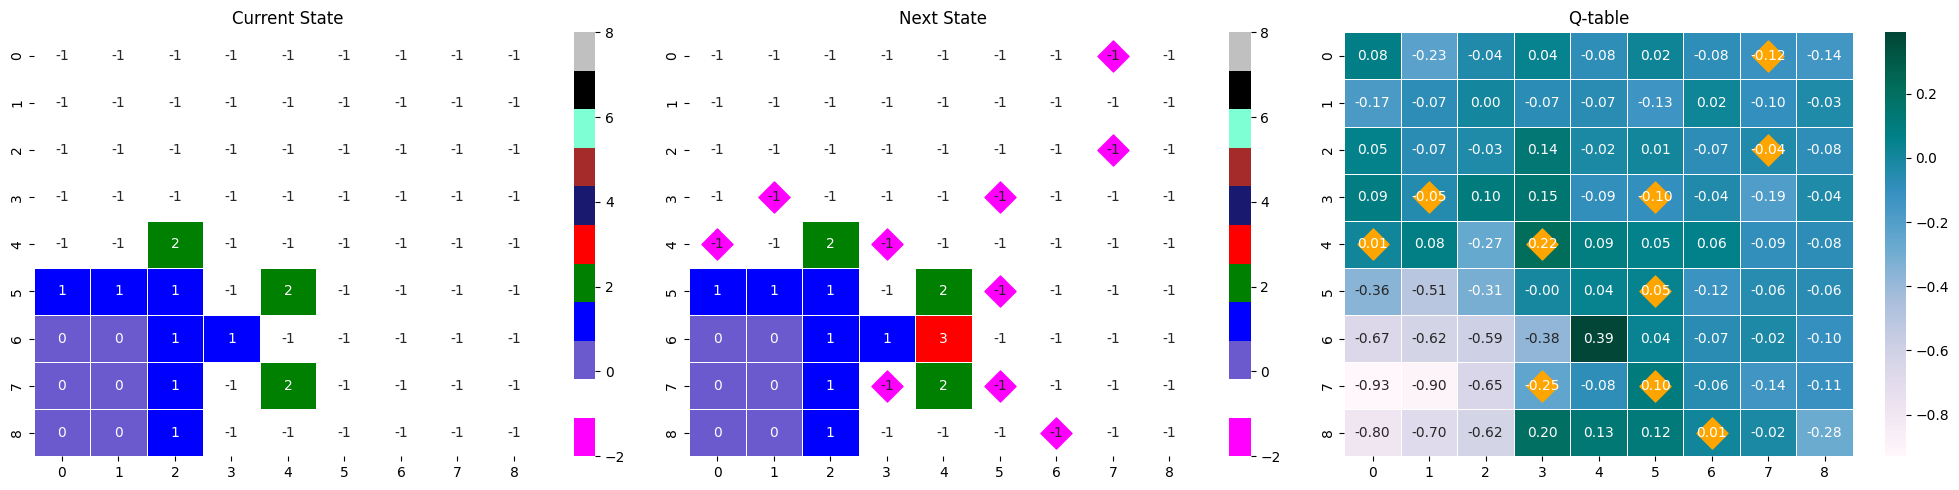

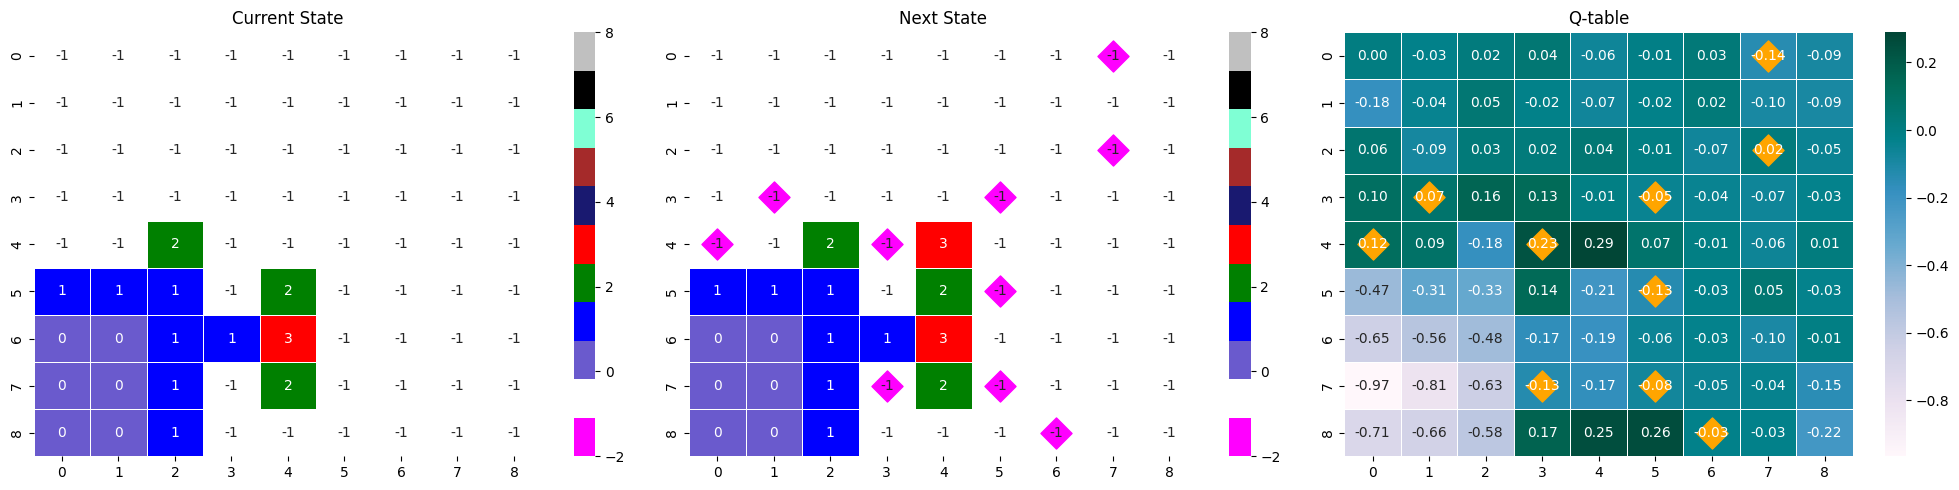

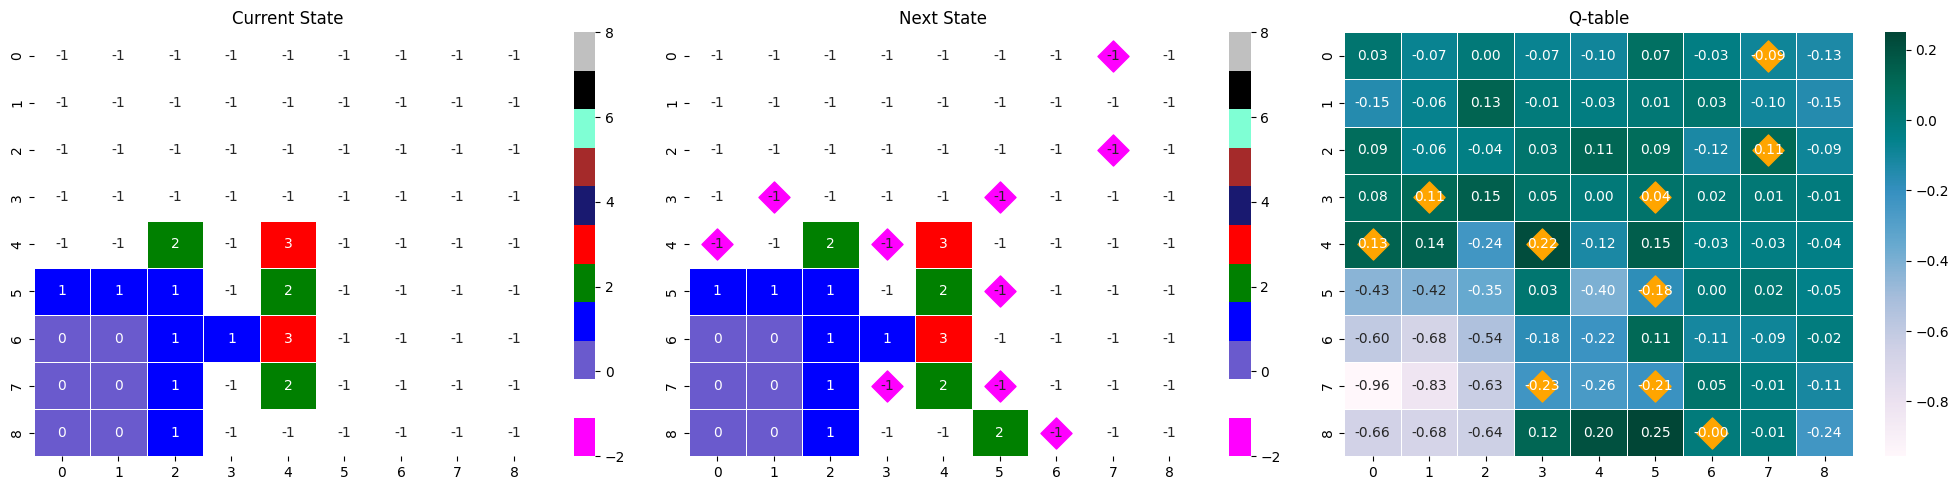

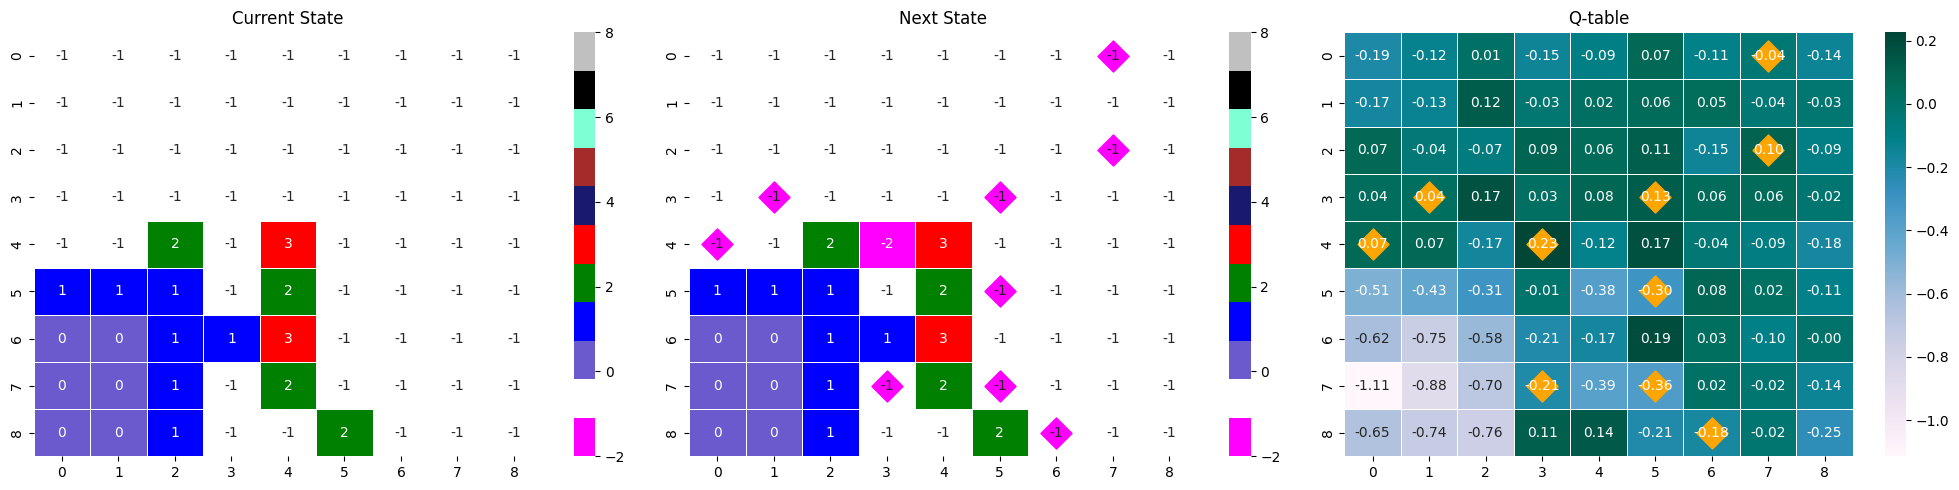

In [57]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx], min_max_scaling=False)

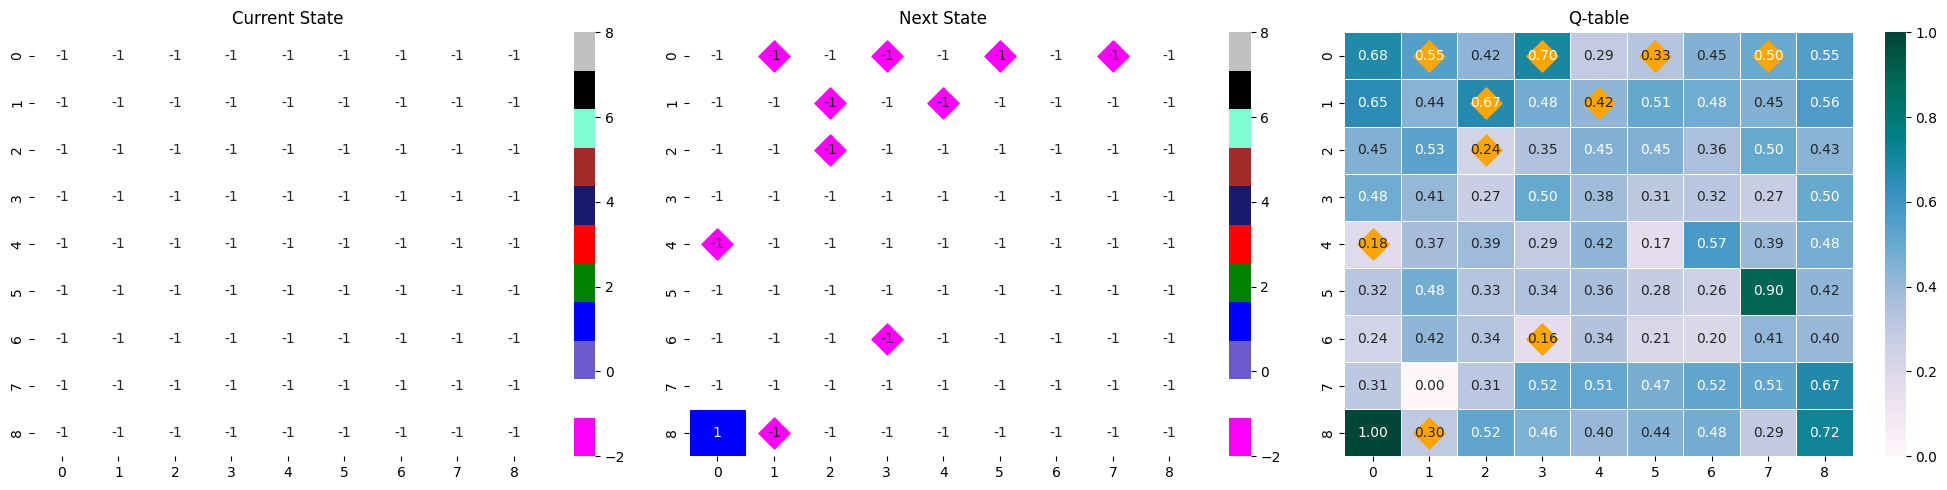

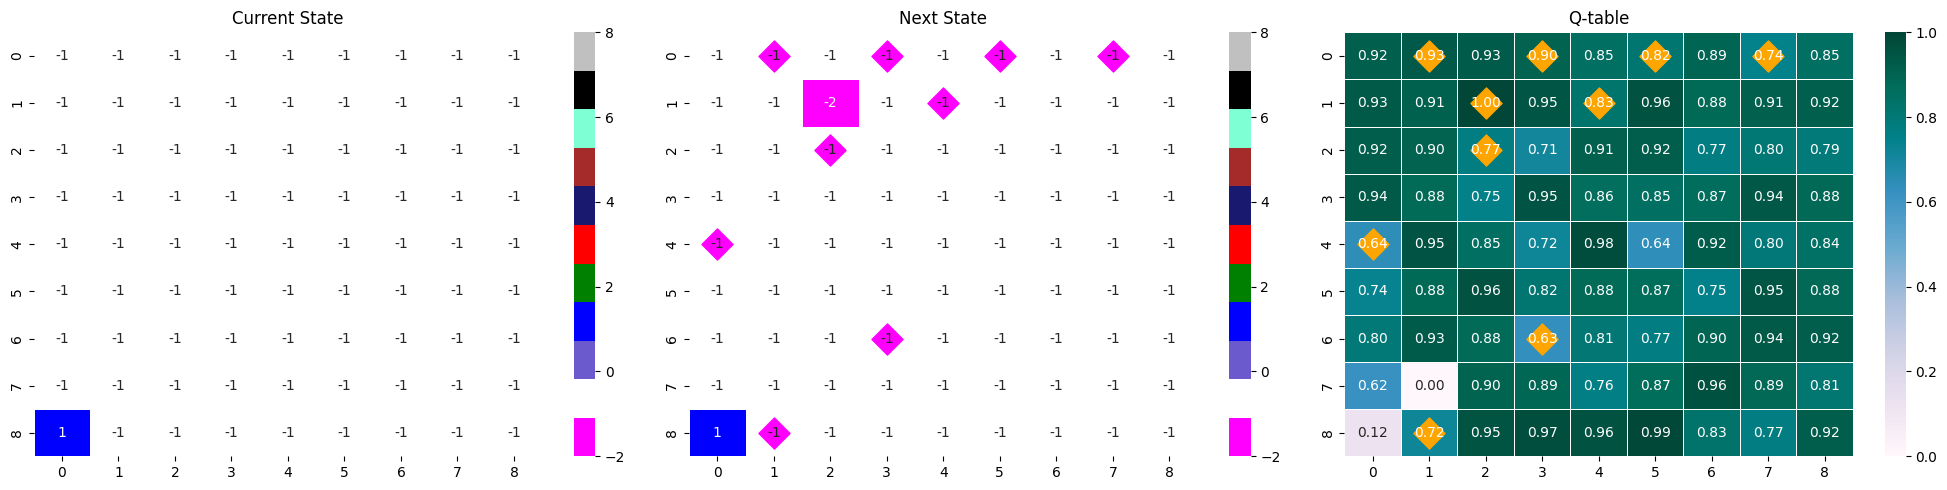

In [41]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx])

## 승리한 케이스 시각화

In [42]:
target_done = tester.won_game_done
idx_iteration = iter(range(len(target_done)))

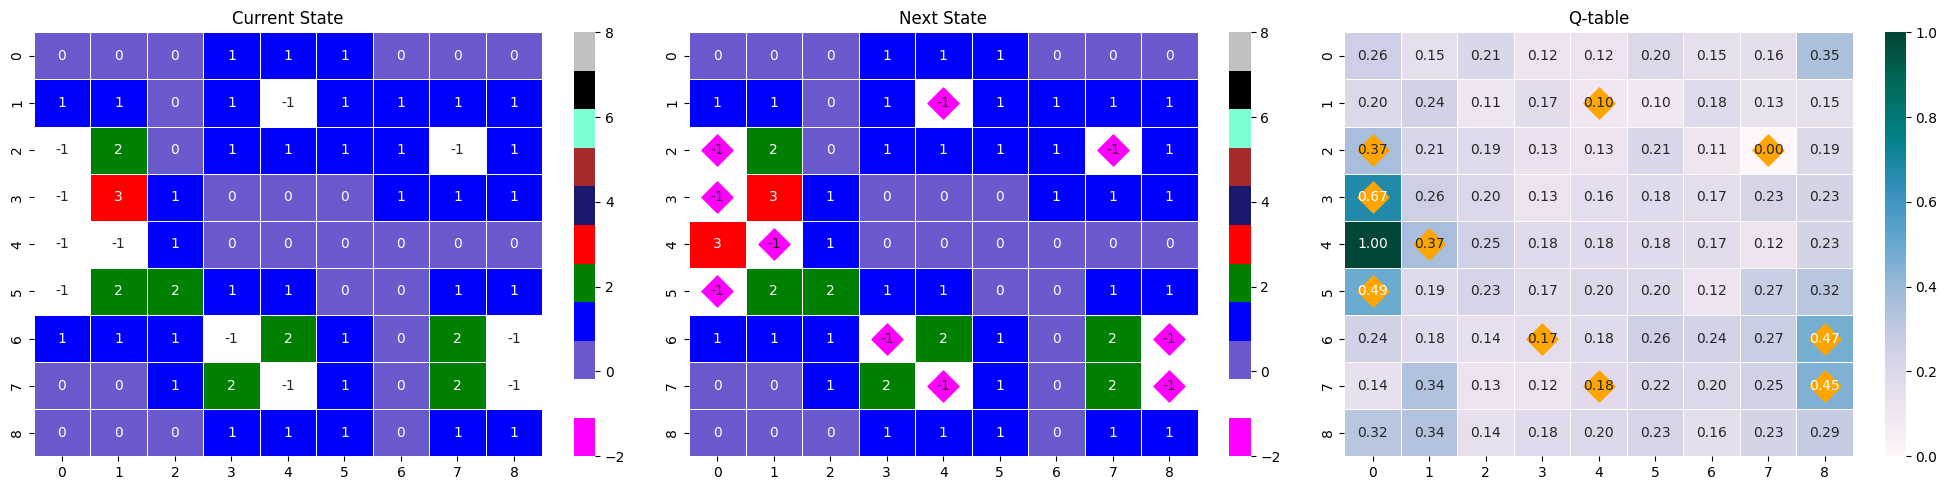

In [43]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx])

In [44]:
target_iter = tester.won_game_per_epi

In [45]:
epi, epi_df = next(target_iter)
tester.replay_single_episode(epi_df)

coord (8, 0) is clicked.


 
coord (5, 2) is clicked.


 
coord (5, 3) is clicked.


 
coord (6, 4) is clicked.


 
coord (4, 4) is clicked.


 
coord (1, 7) is clicked.


 
coord (1, 6) is clicked.


 
coord (2, 8) is clicked.


 
coord (0, 6) is clicked.


 
coord (0, 4) is clicked.


 
coord (8, 4) is clicked.


 
coord (8, 8) is clicked.


 
coord (5, 1) is clicked.


 
coord (4, 0) is clicked.


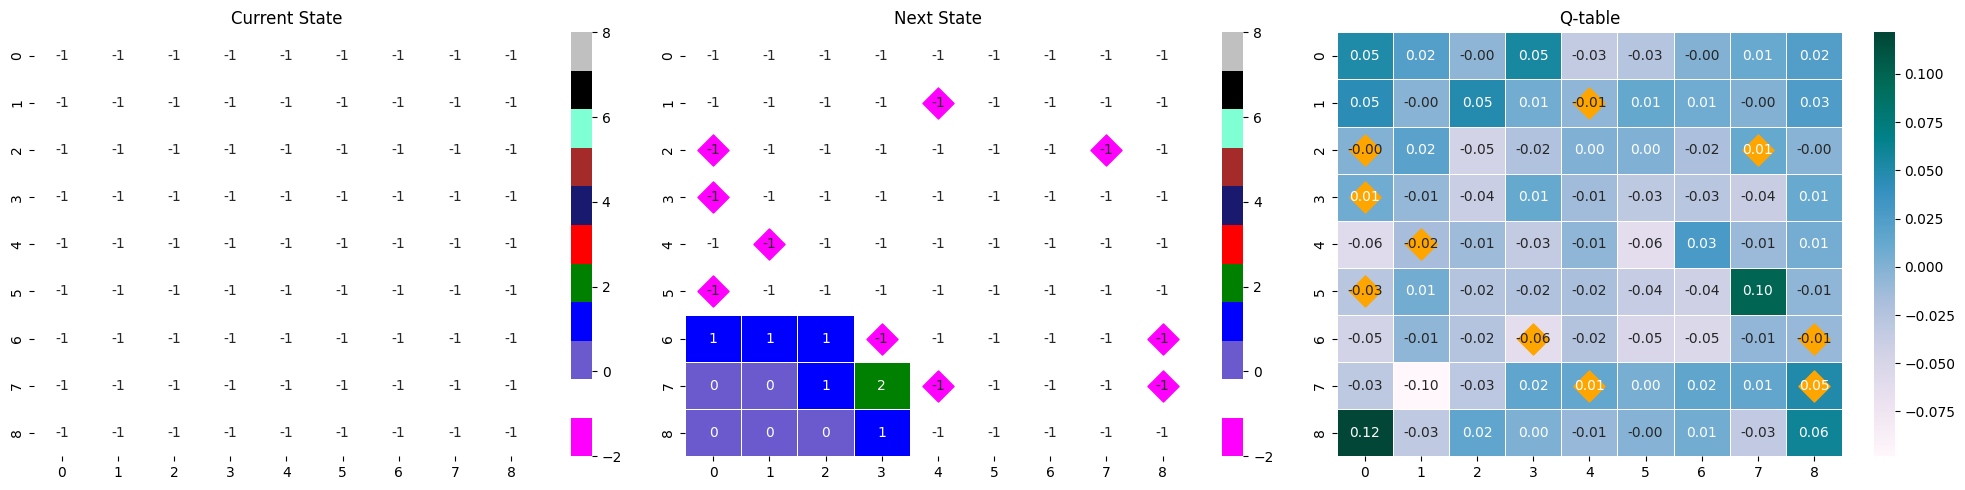

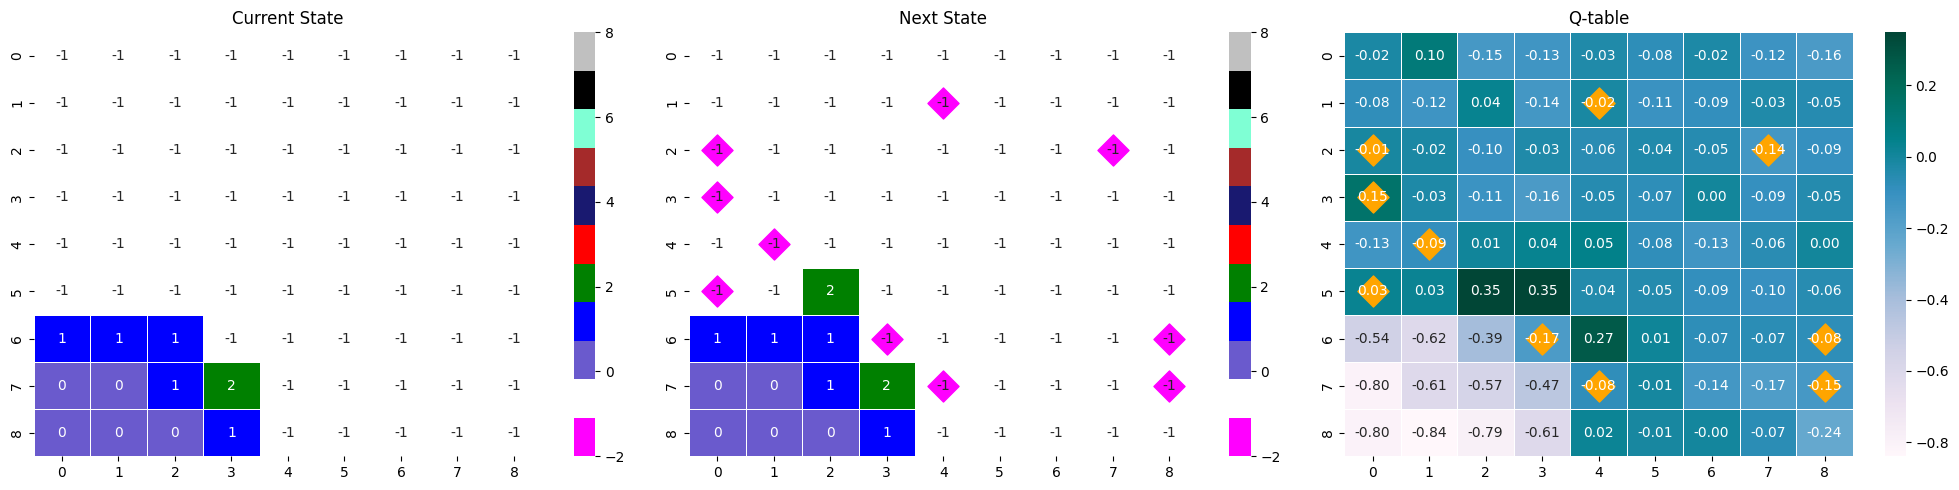

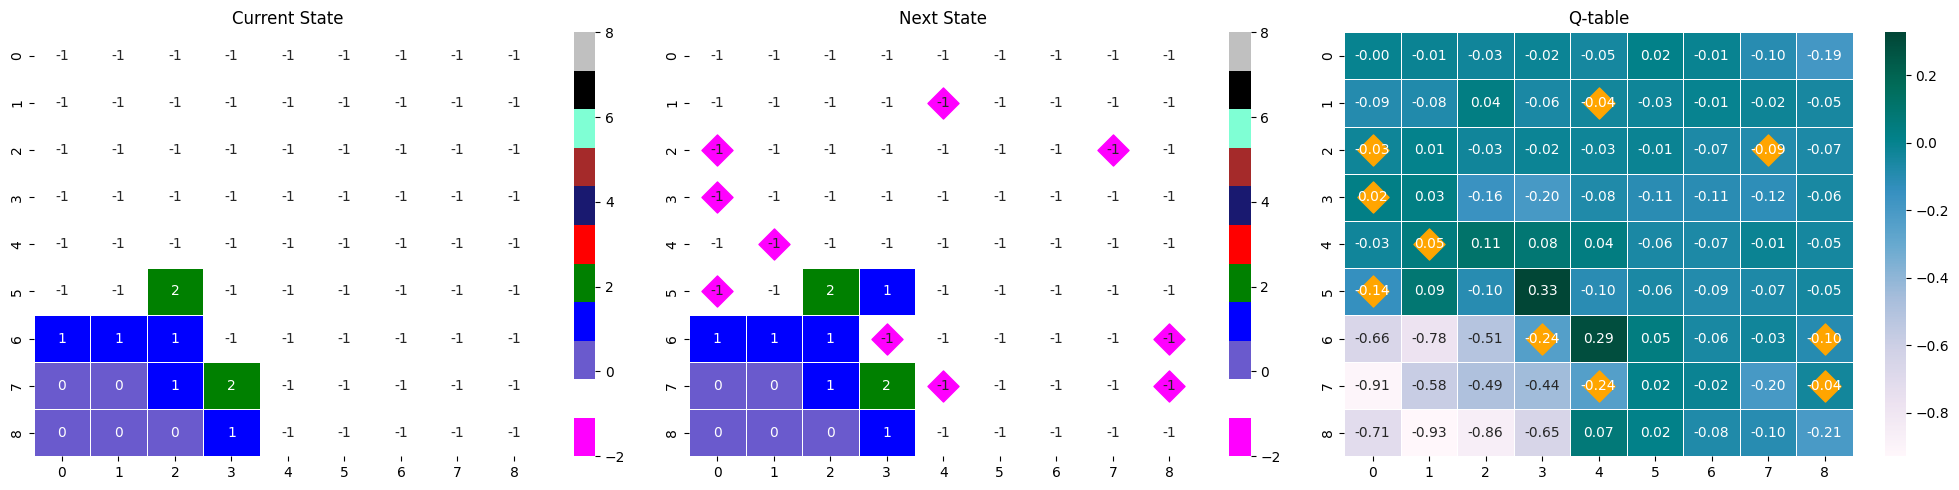

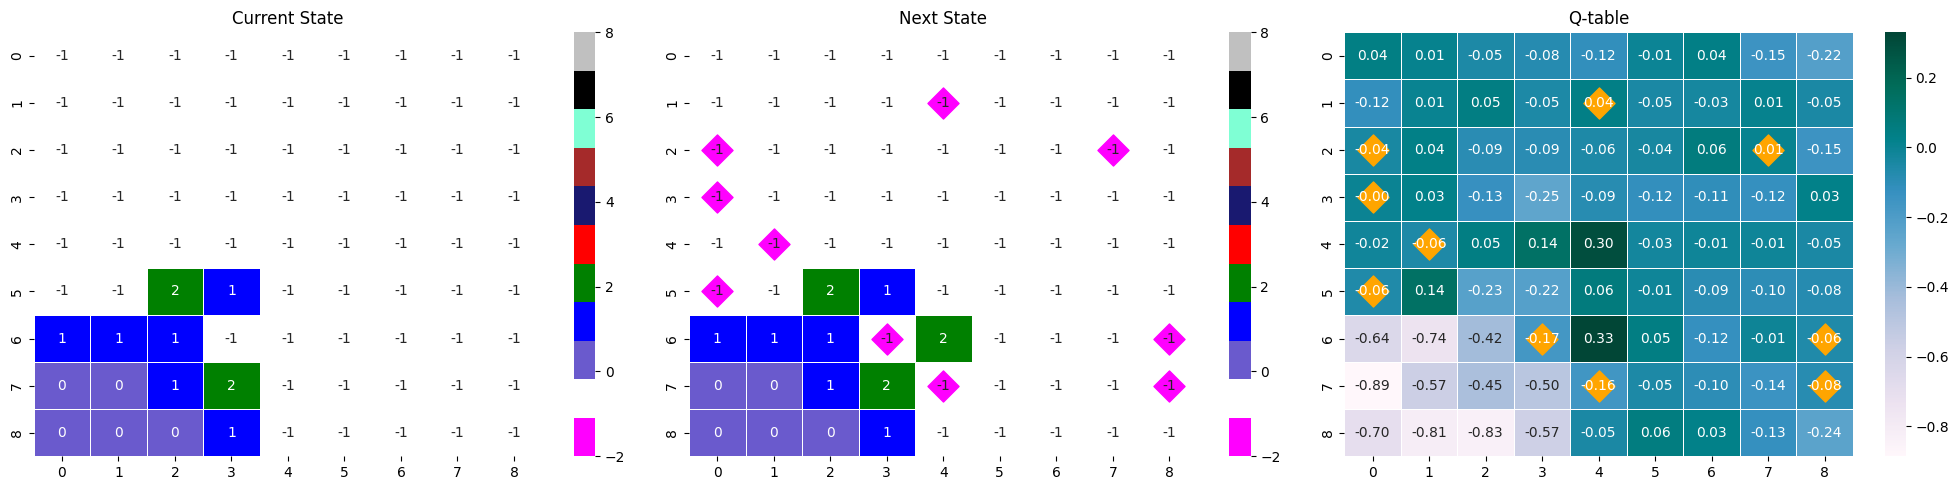

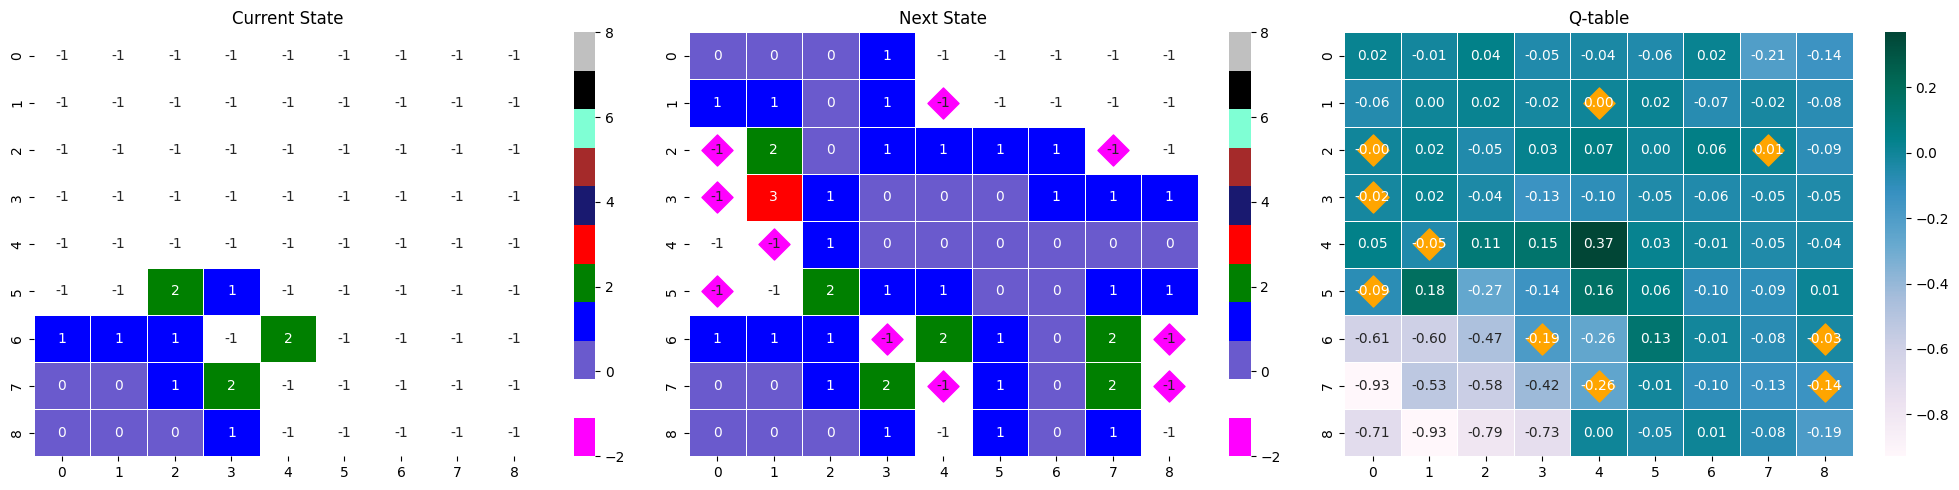

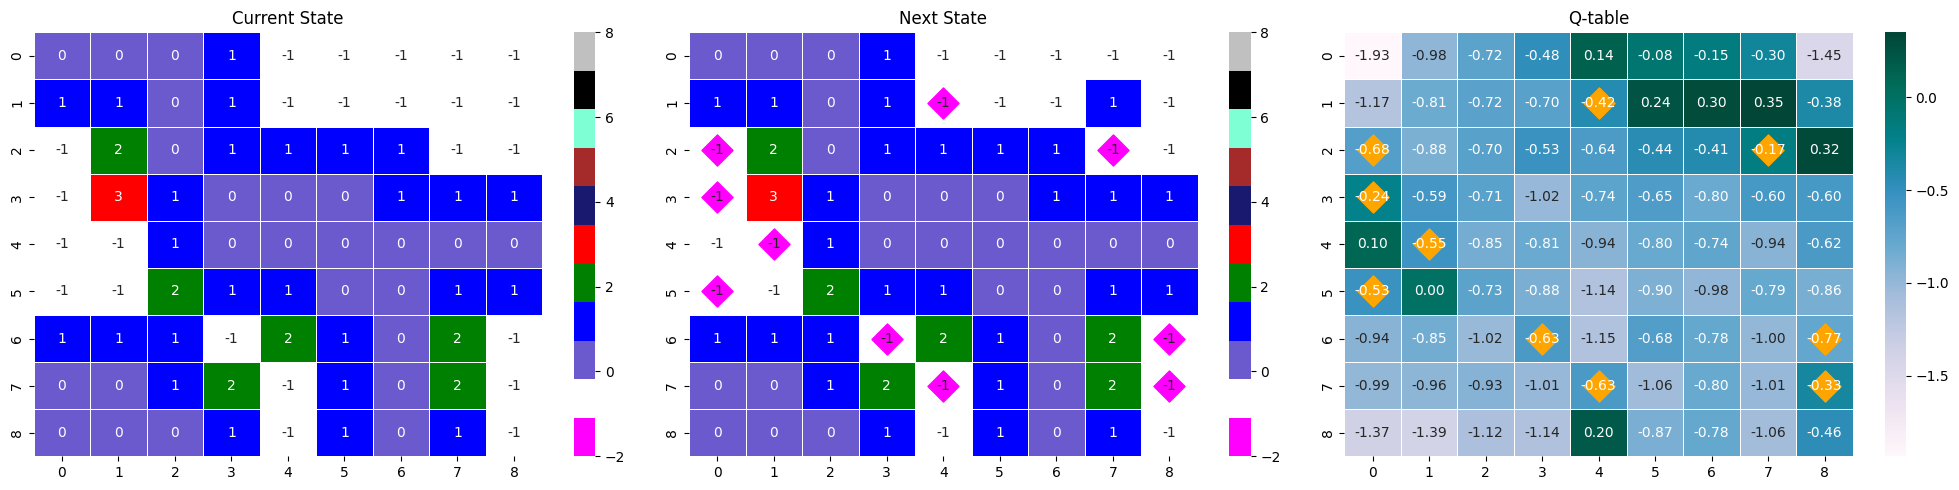

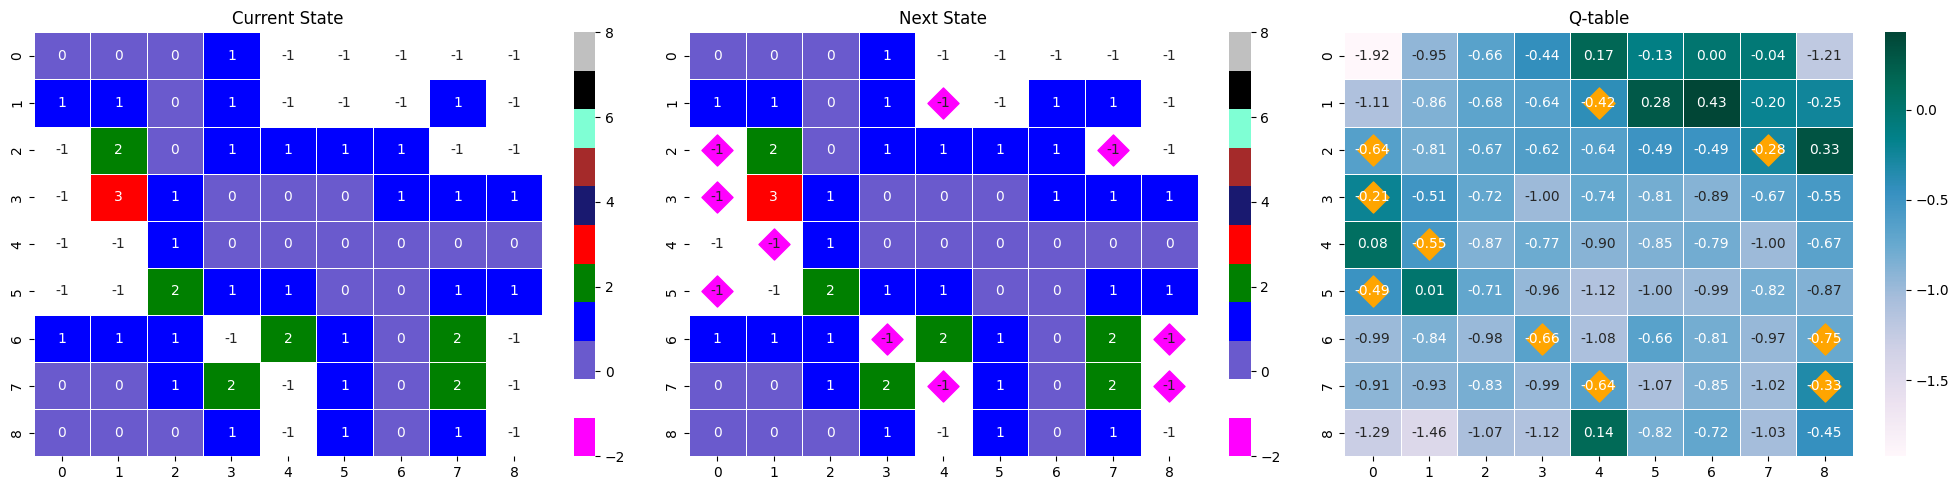

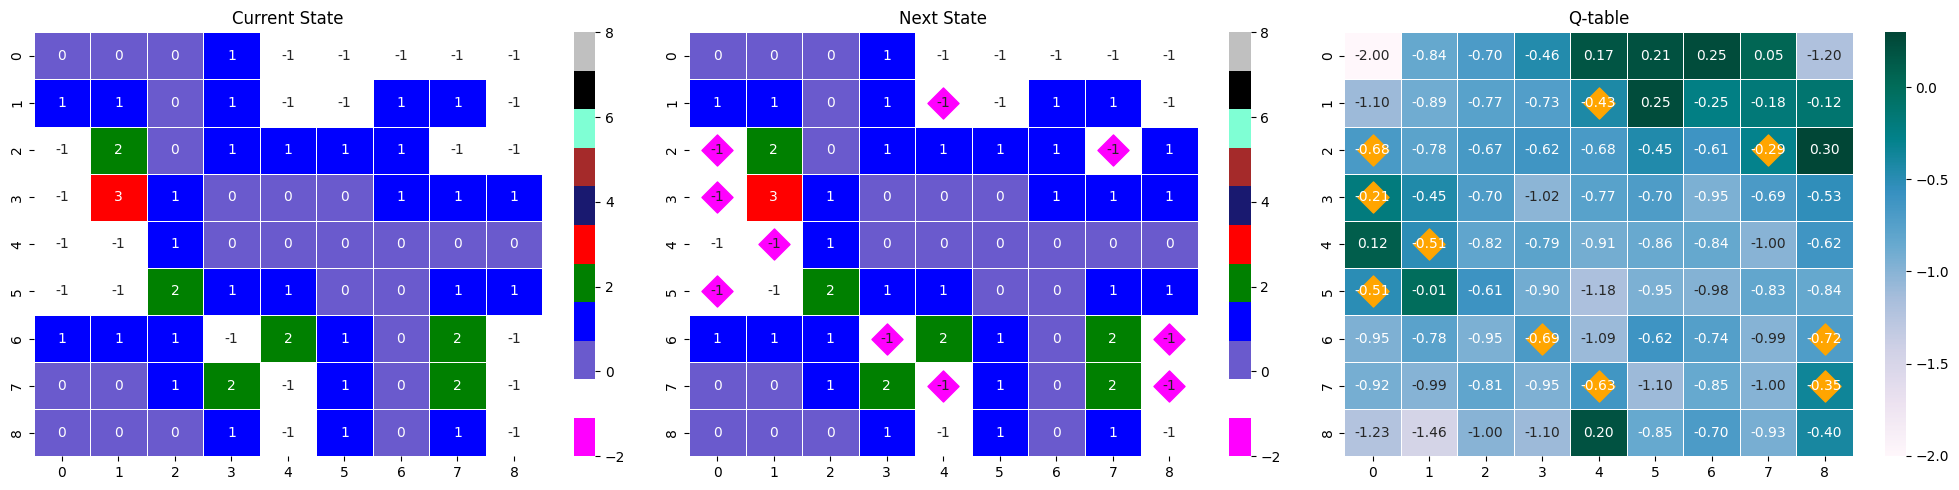

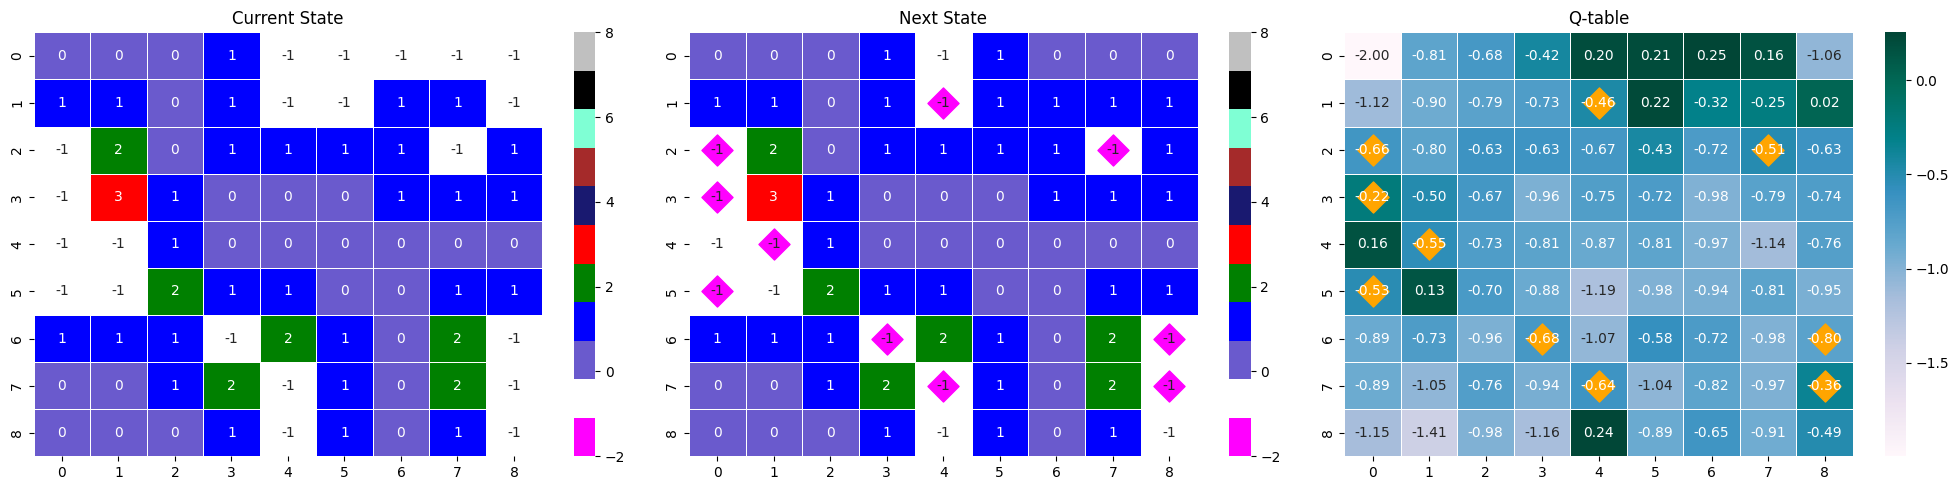

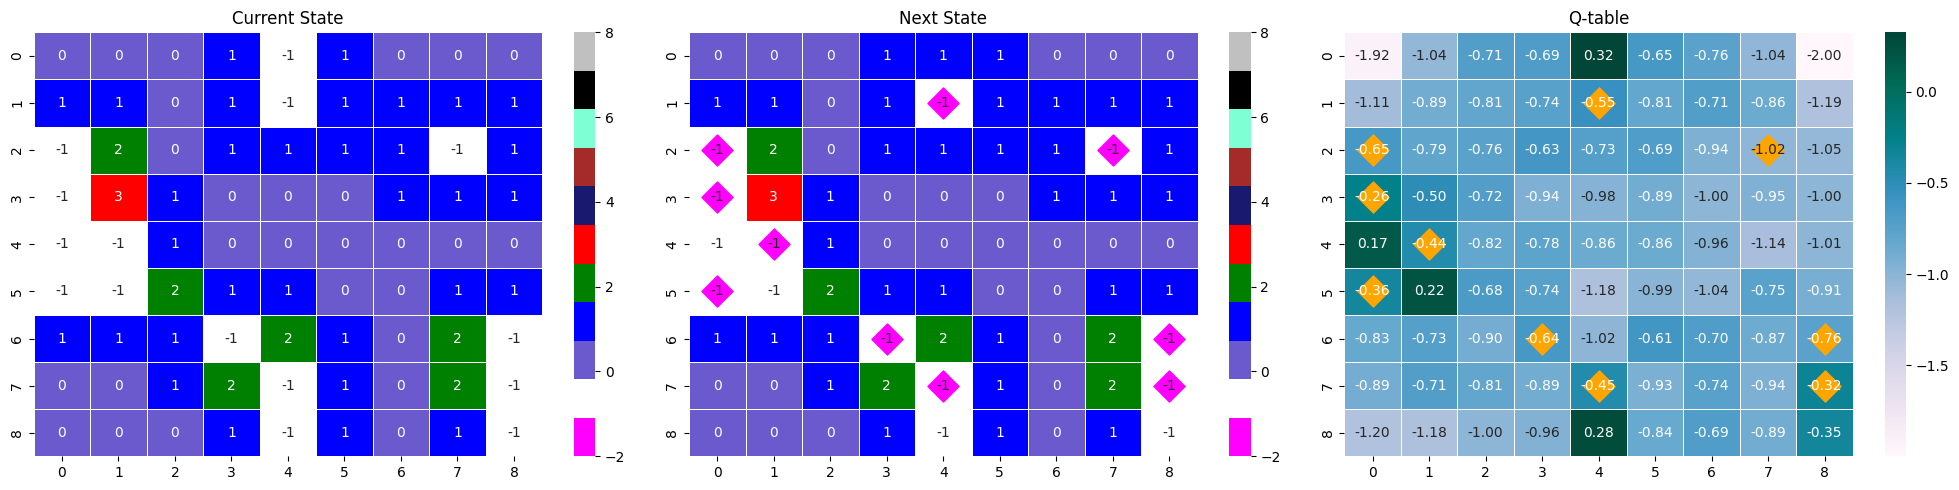

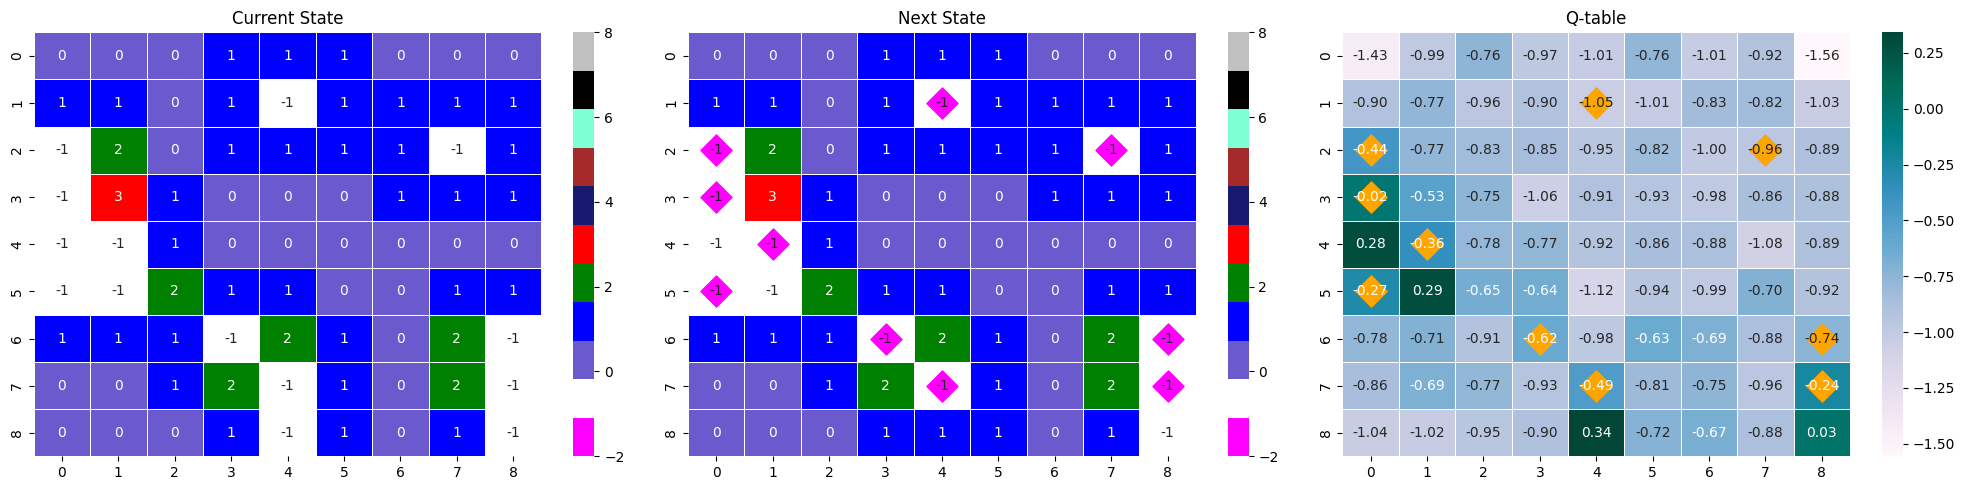

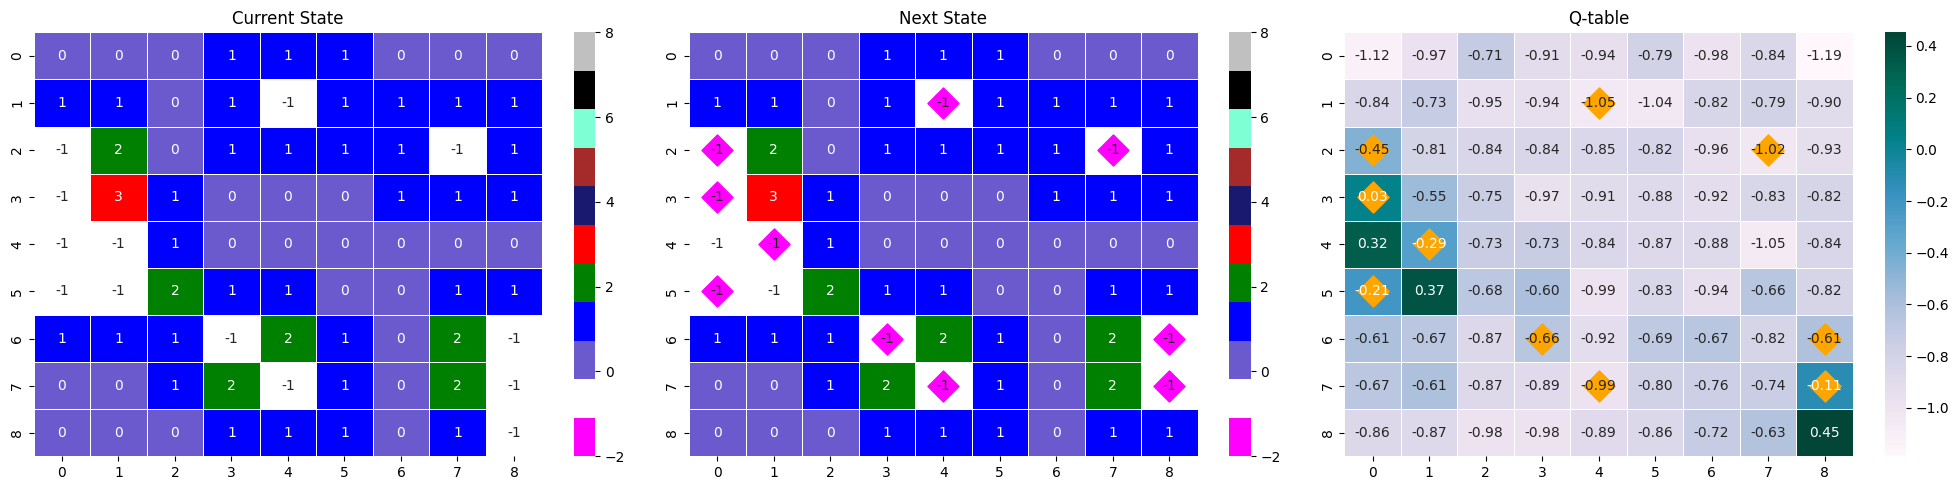

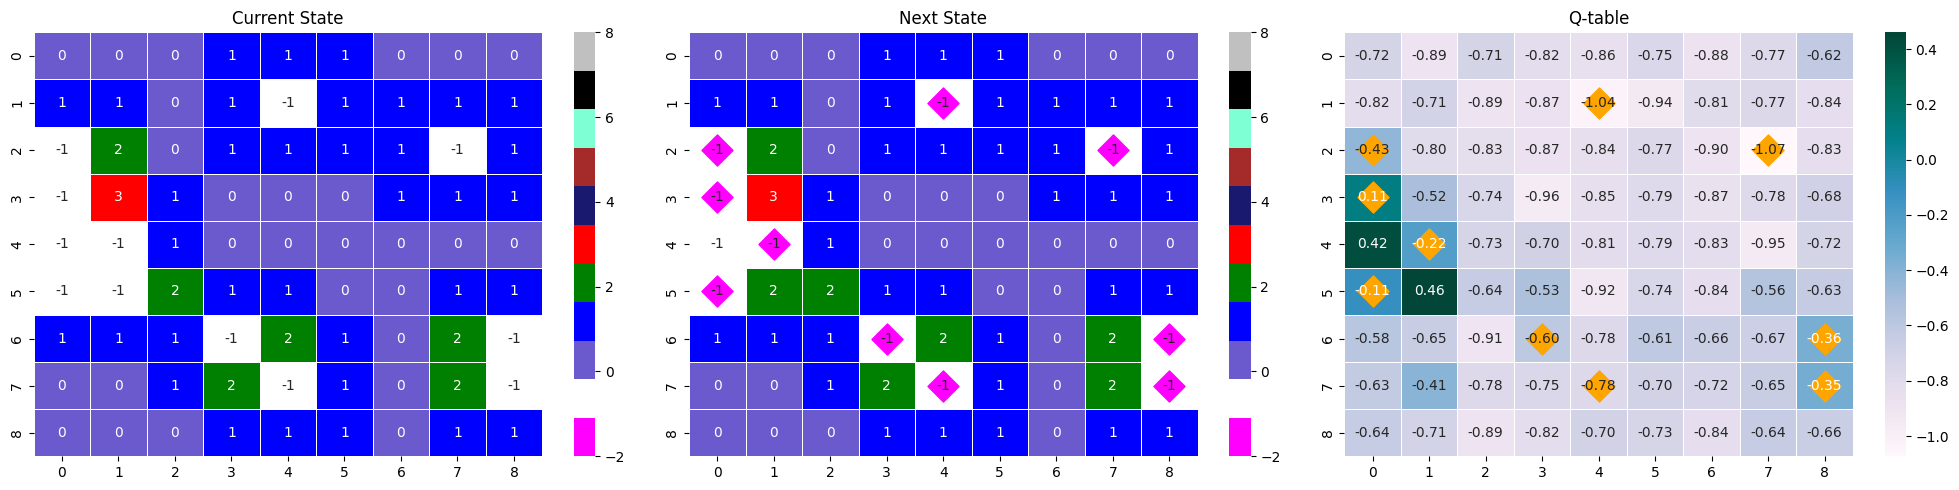

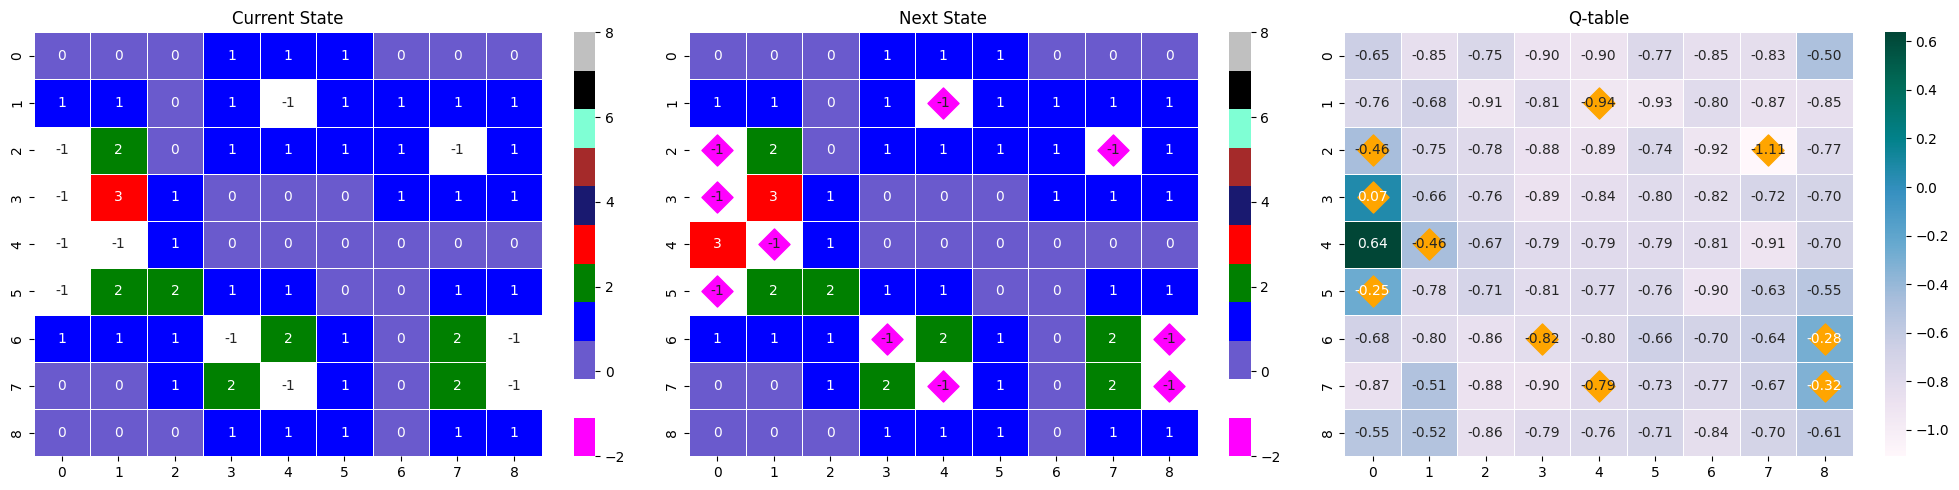

In [46]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx], min_max_scaling=False)

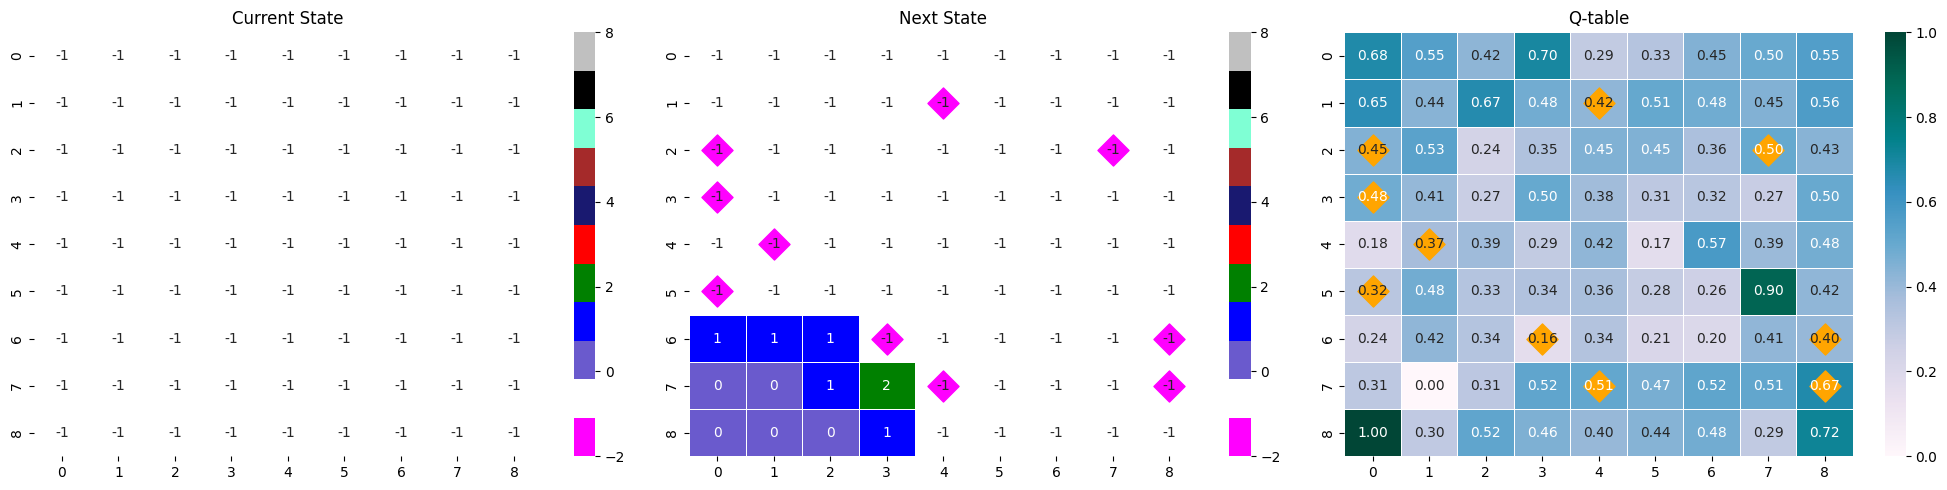

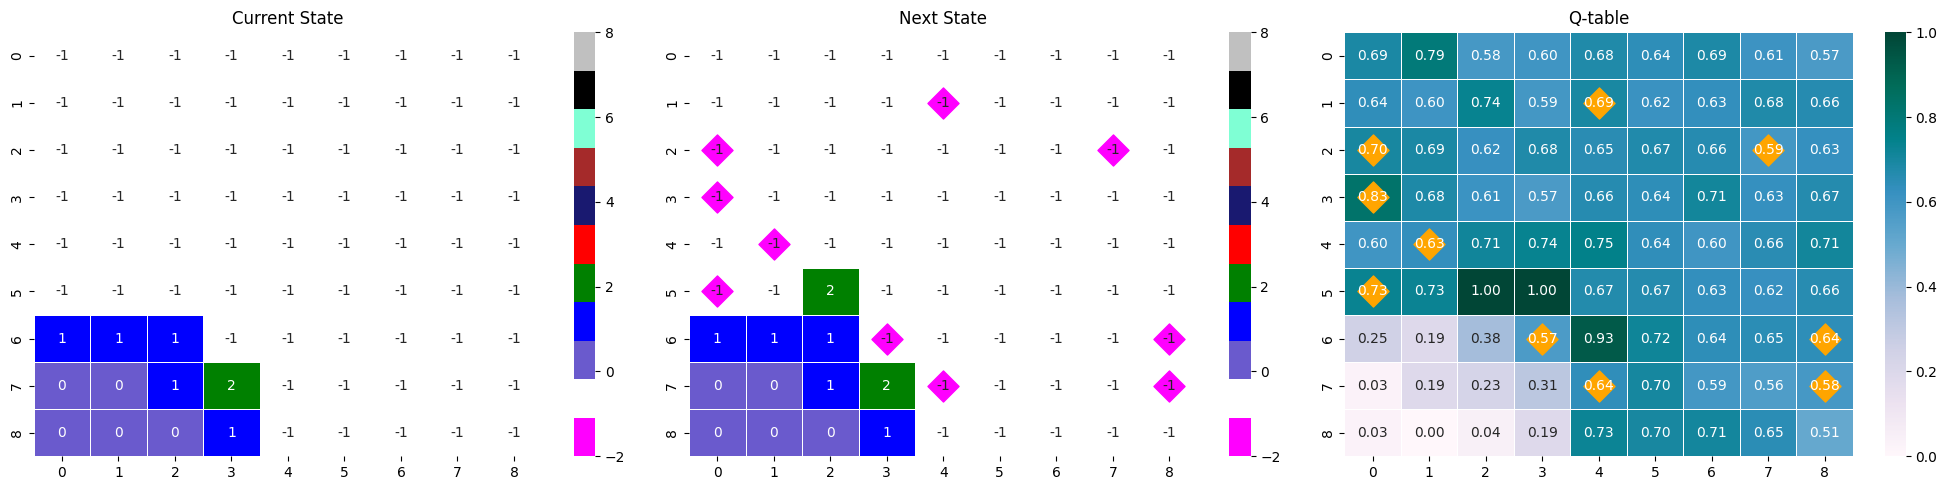

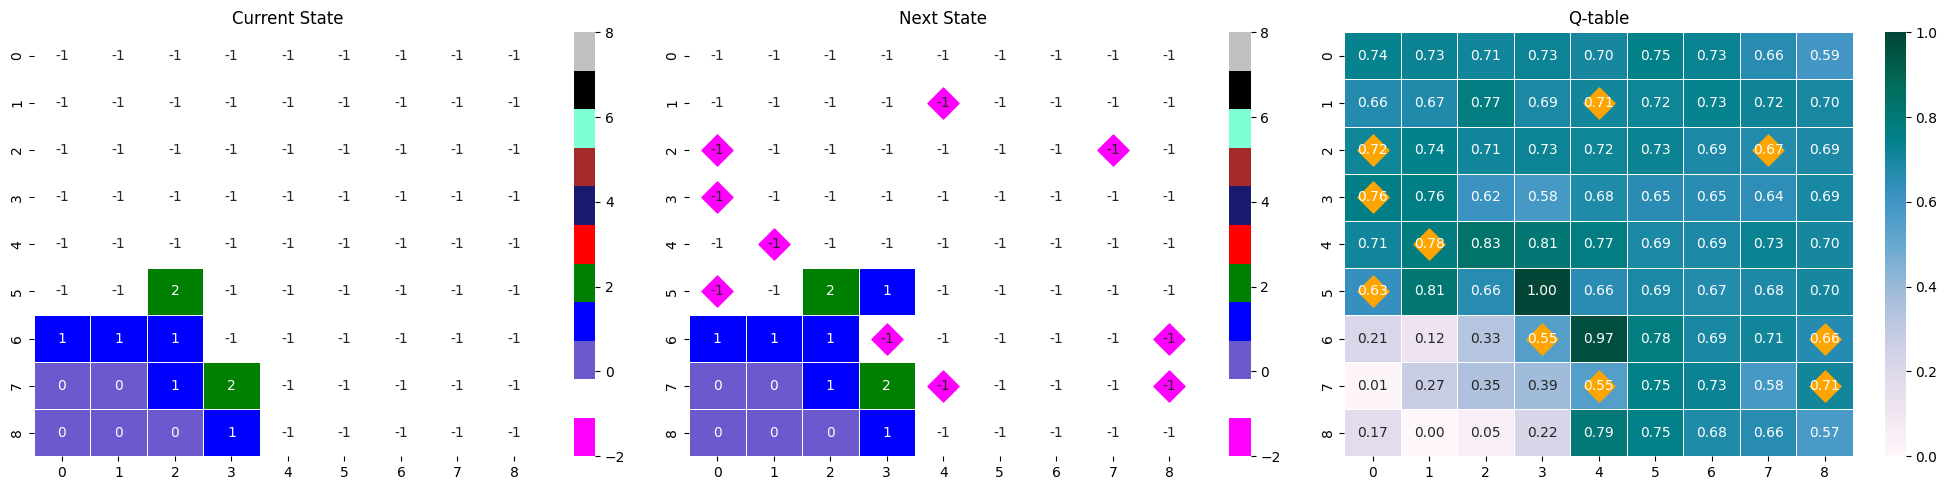

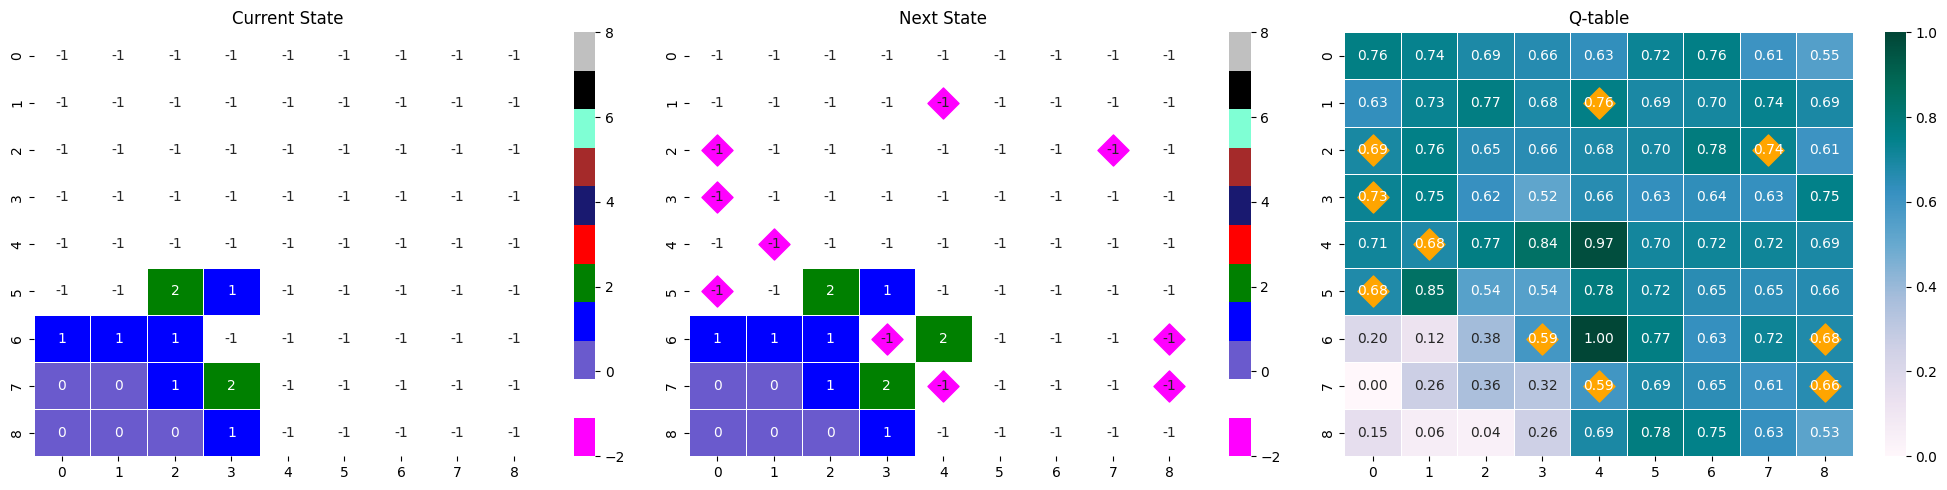

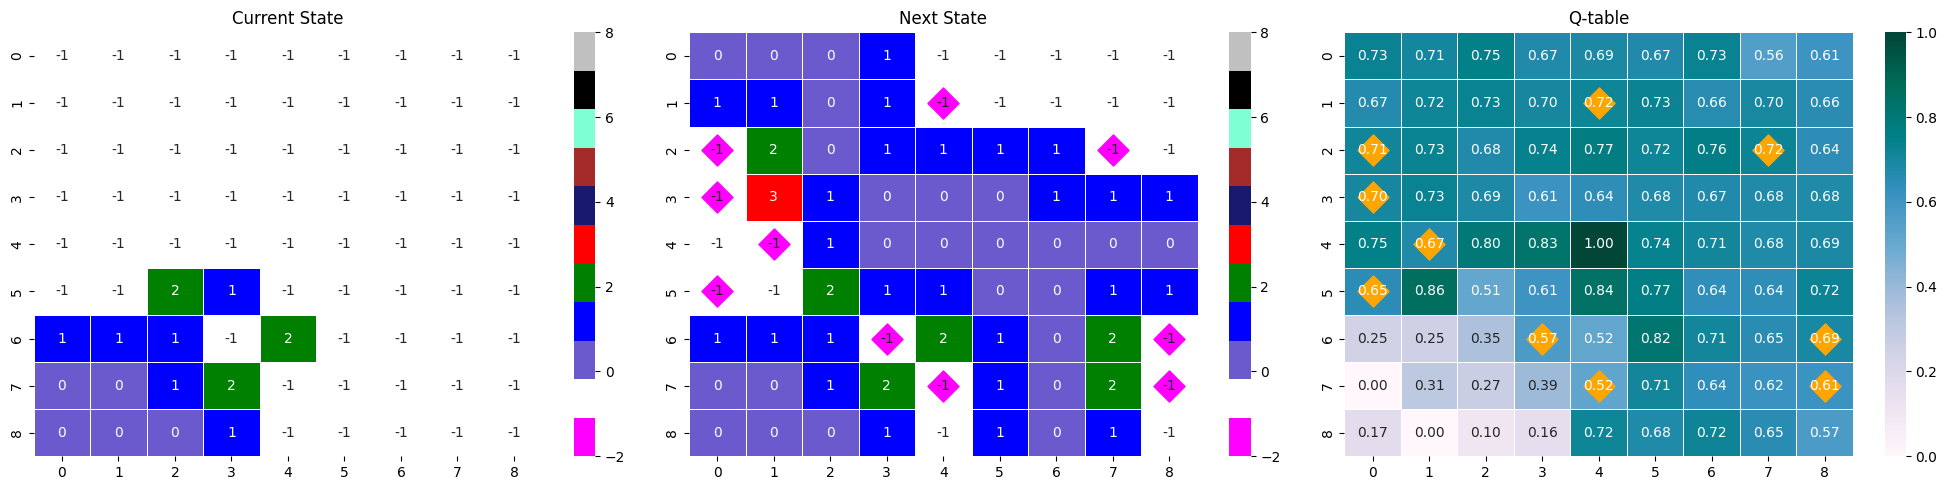

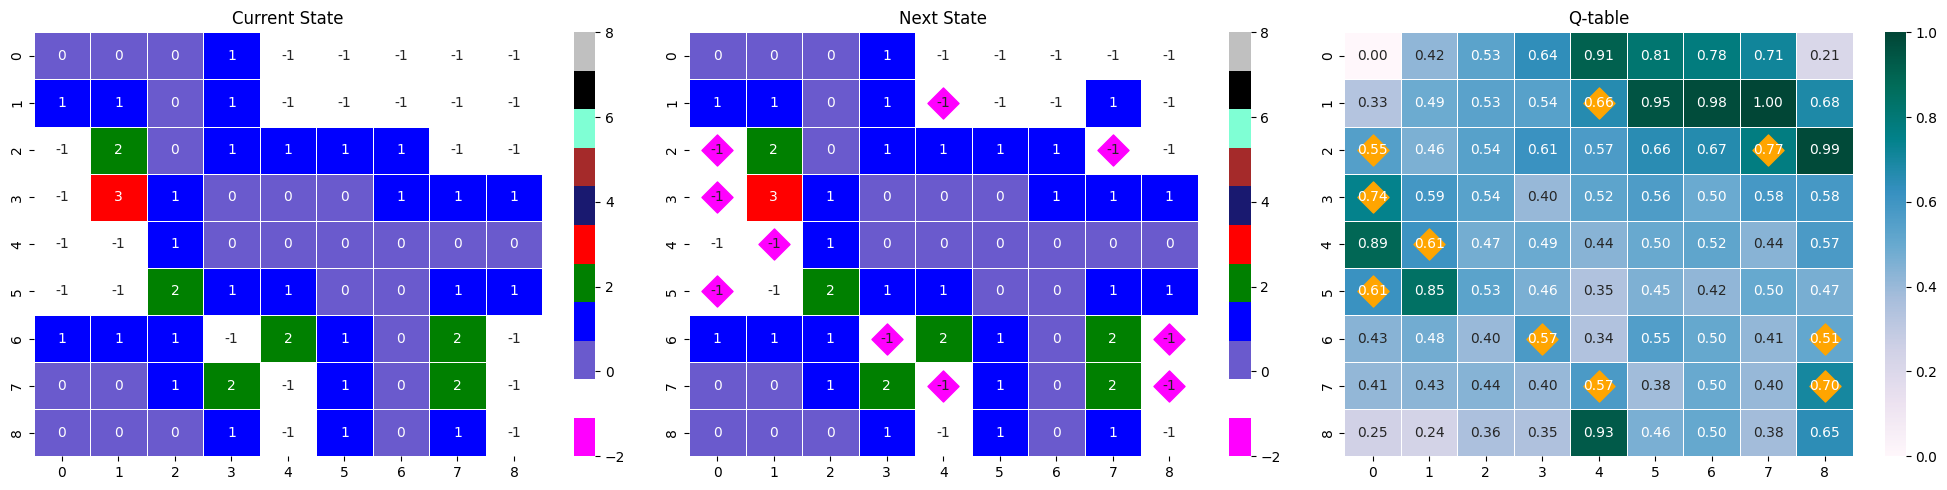

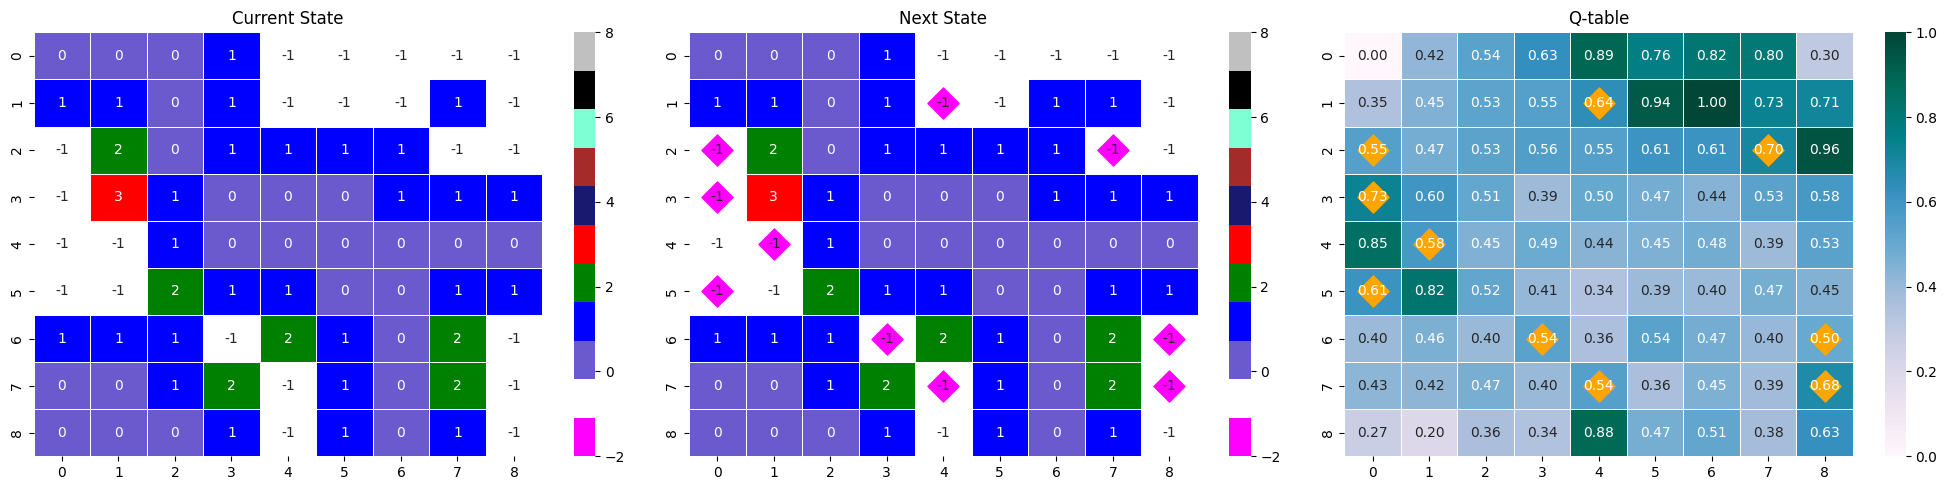

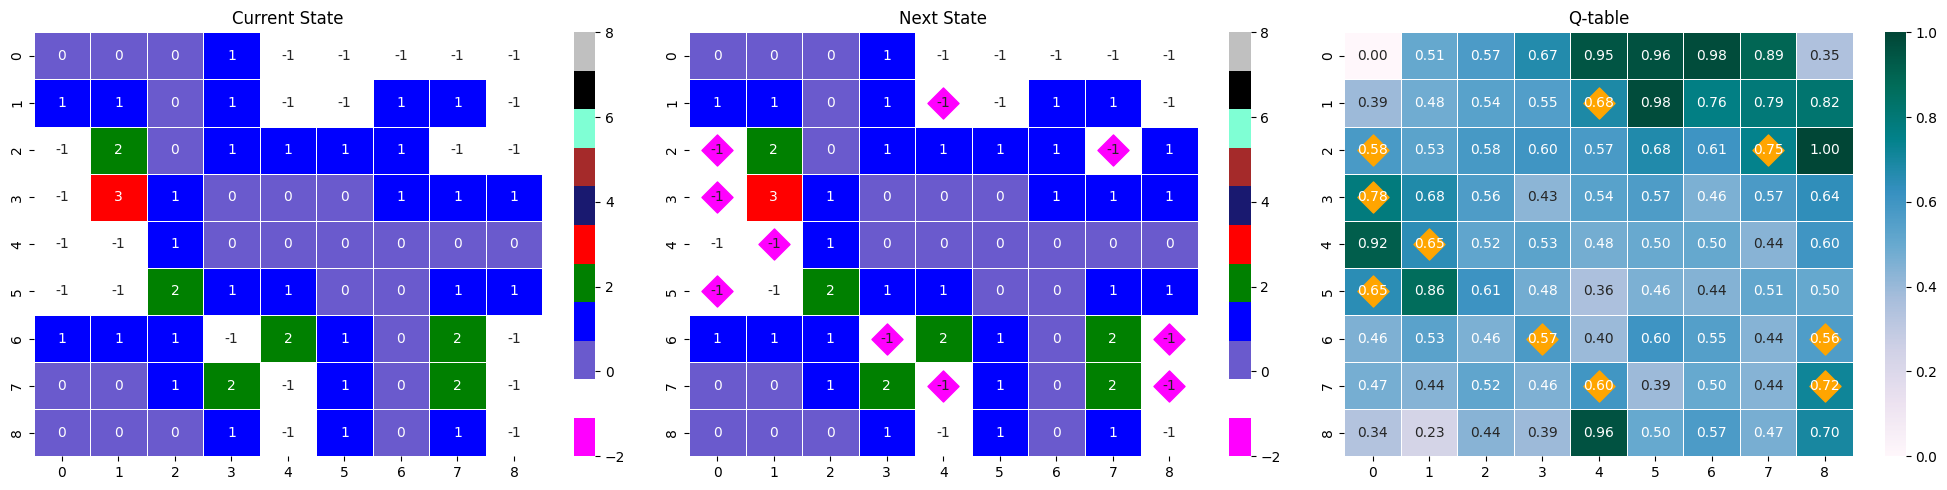

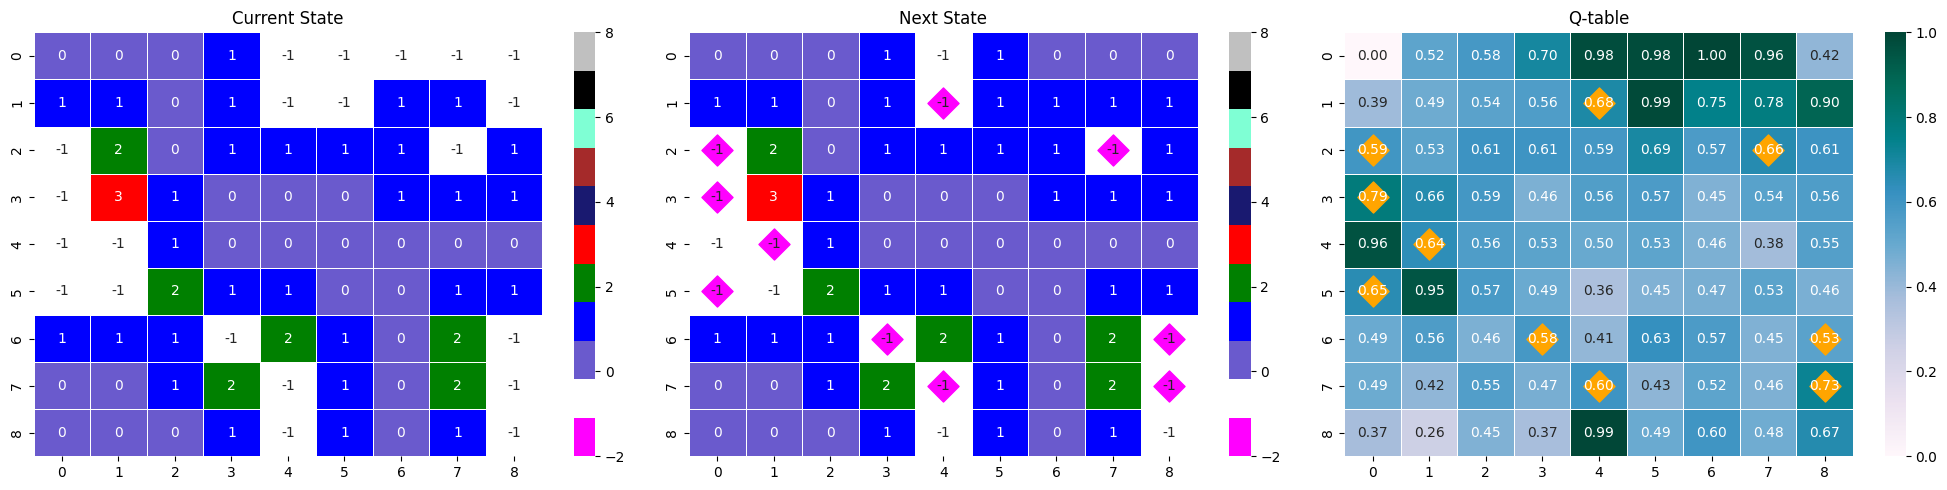

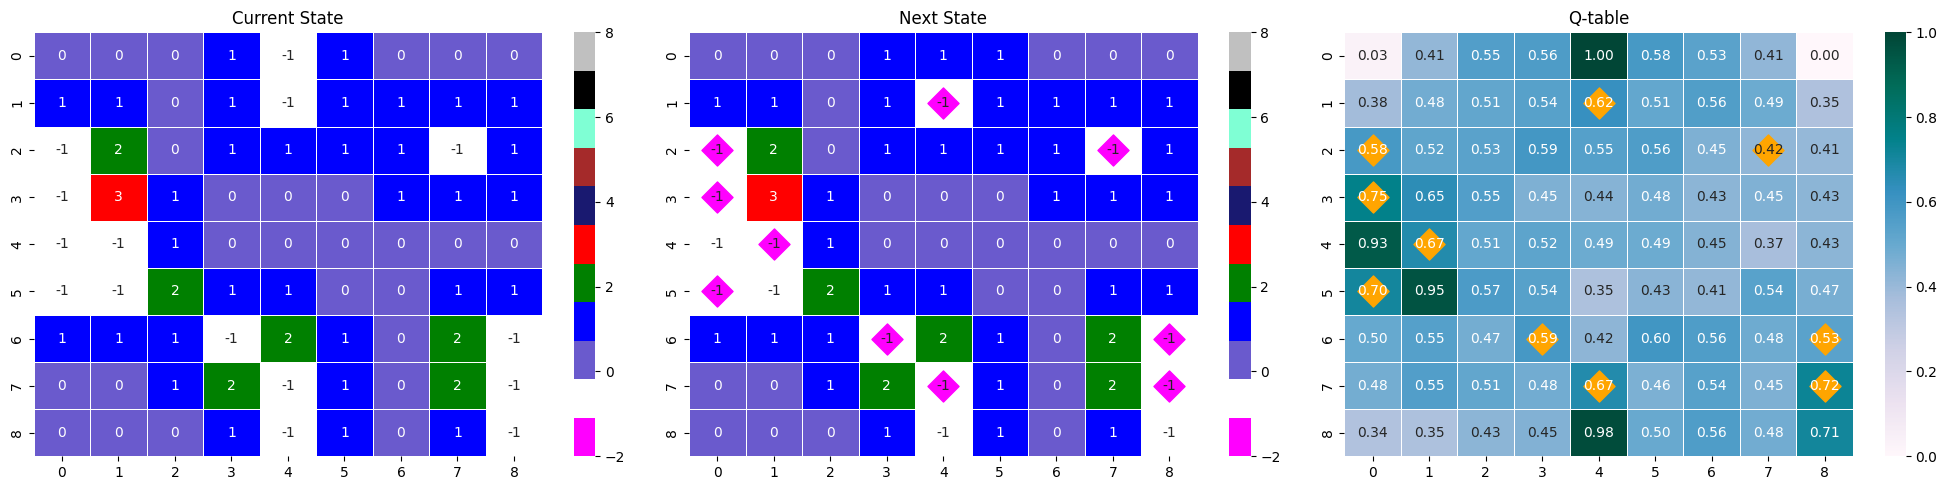

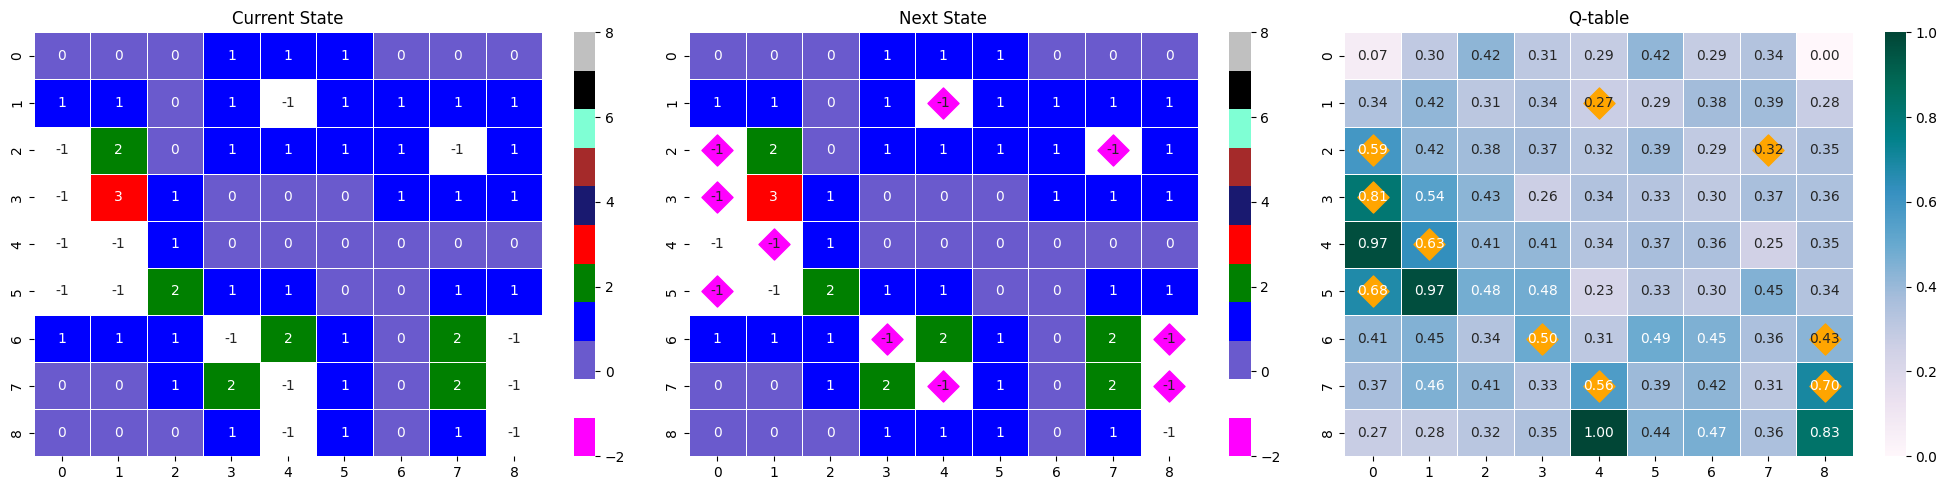

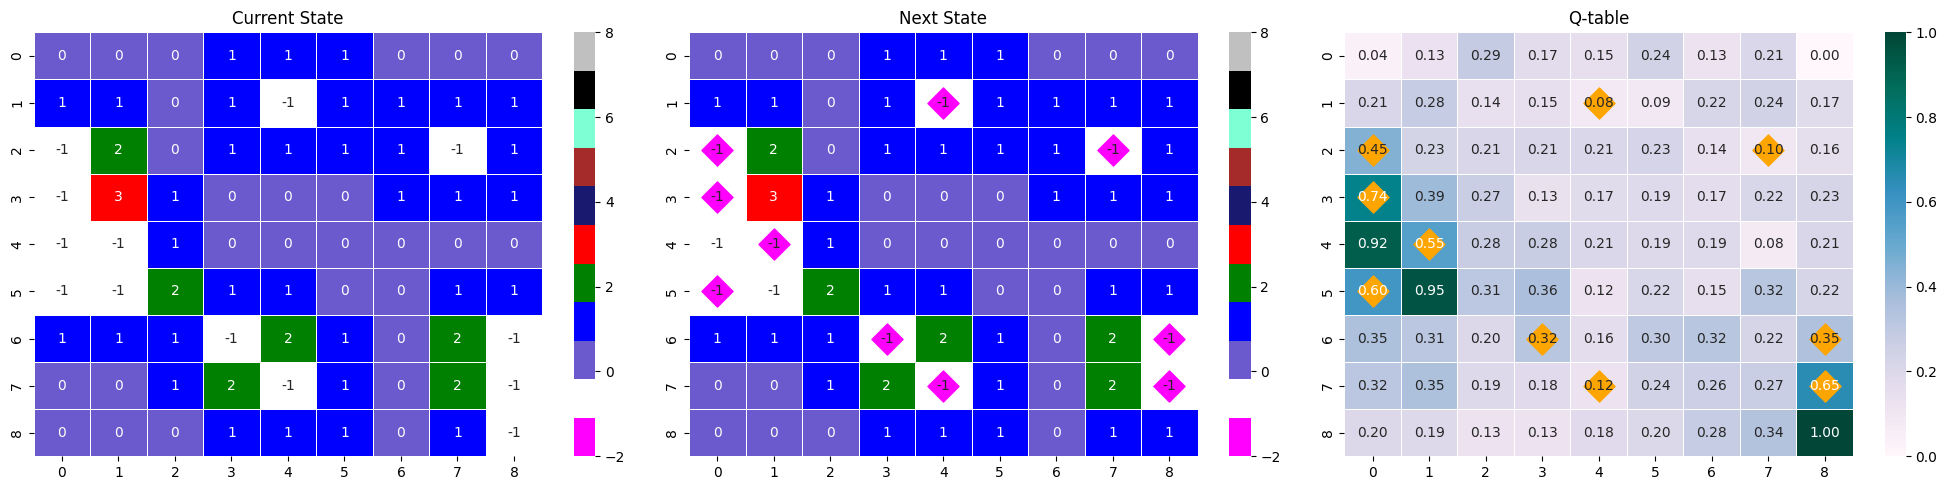

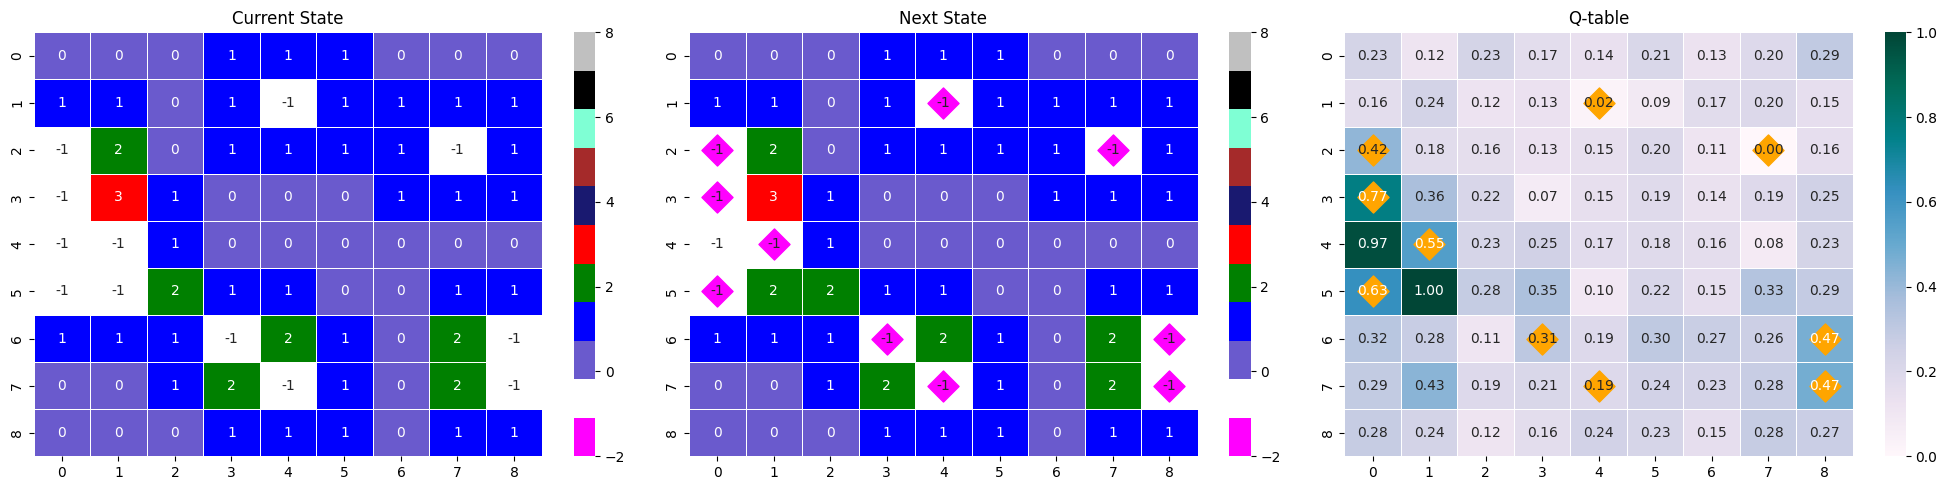

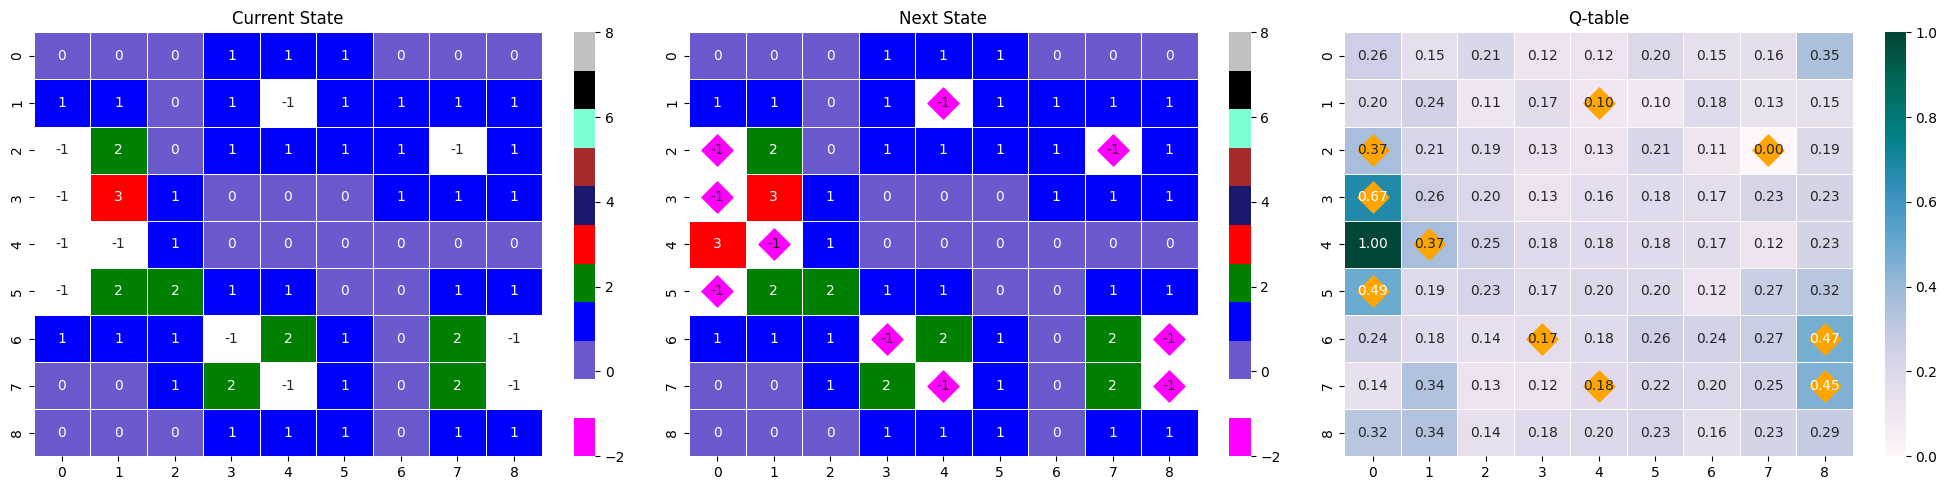

In [47]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx])